# **Medikal Metinlerin Sınıflandırılması**

In [ ]:
import datetime
print(f"Bu çalışma kitabının son çalışma tarihi: {datetime.datetime.now()}")

Bu çalışma kitabının son çalışma tarihi: 2025-01-02 19:29:58.423089


In [ ]:
# GPU var mı?
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5a3cb6f8-b03a-a8b4-bddd-74a236c92ff7)


### **İçindekiler**
```
1. Tanıtım & Genel Bilgiler
2. Veri
  2.1. Verilerin Yüklenmesi ve Kontrolü
  2.2. Satır Okuma Fonksiyonu
  2.3. Veriyi Ön İşleyecek Fonksiyon Yazımı
  2.4. Verilerin İncelenmesi
  2.5. Tek Sıcak Kodlayıcı İle Sayısal Etiketler
3. Modelleme
  3.1. Model 0 Temel Model Yazımı ve Değerlendirilmesi
  3.2. Yardımcı Fonksiyonlar Dosyası
  3.3. Derin Modelleme İçin Veri Hazırlığı
  3.4. Metin Vektörleştirme
  3.5. Gömme Hazırlama
  3.6. Veri Kümelerini hazırlama
  3.7. Kelime Düzeyinde Conv1D İle Modelleme ve Değerlendirme
  3.8. Tensorflow Hub İle Modelleme ve Değerlendirme
  3.9. Karakter Düzeyinde Conv1D İle Modelleme ve Değerlendirme
  3.10. Önceden Eğitilmiş Token Gömmeler ve Karakter Gömmeleri Birleştirerek Modelleme ve Değerlendirme
  3.11. Önceden Eğitilmiş Token Gömmeler, Karakter Gömmeleri ve Konumsal Gömmeleri Birleştirerek Modelleme ve Değerlendirme
4. Model Sonuçlarını Karşılaştır
5. Model Kaydetme ve Yükleme
6. Değerlendirme
  6.1. Doğrulama Veri Setini Değerlendir
  6.2. Test Veri Setinde Modeli Değerlendir
  6.3. En Çok Yanlışı Bul
  6.4. Örnek Tahminler Yap
  6.5. Kendi Denemelerim :)
7. Kaynakça
```

# **1. Tanıtım & Genel Bilgiler**

PubMed sağlıkla ilgili makalelerin yer aldığı bir websitesidir. Bu çalışmada 2017 tarihli PubMed 200k RCT makalesinin arkasındaki derin öğrenme modelini çoğaltacağız: Tıbbi Özetlerde Sıralı Cümle Sınıflandırması için Bir Veri Kümesi. https://arxiv.org/abs/1710.06071

Yayınlandığında, makale ~200.000 etiketli Randomize Kontrollü Deneme (RCT) özetinden oluşan PubMed 200k RCT adlı yeni bir veri kümesi sundu.

Veri kümesinin amacı, NLP modellerinin sıralı olarak görünen cümleleri sınıflandırma yeteneğini araştırmaktı.

Başka bir deyişle, bir RCT'nin özeti göz önüne alındığında, her cümle soyutta nasıl bir role hizmet eder?

Uzun bir paragrafı bölümlere ayırıp özetini çıkarmak isteseydik? Buradaki model many to one sorunu. Örnek bir paragrafta on cümle varsa hepsi ayrı ayrı değerlendirilir, bu input, ama hedef paragrafın etiketi ise tek kelime, bu da output. Yani kolaylaştırmak için her bir diziye hangi bölüme ait olmaları gerektiğine dair etiket veririz.

Modelleme Adımları

1. Verileri hazırlayın (tensörlere dönüştürün)
2. Tensorflow hub'ı, önceden eğitilmiş bir model oluşturun veya seçin (sorunuza uyacak şekilde)
3. Modeli verilere uydurun ve tahmin yapın
4. Modeli değerlendirin
5. Deneyerek geliştirin
6. Eğitilen modelinizi kaydedin ve yeniden yükleyin

* Tüm veri sayılara dönüştürülmeli. Nöral ağlar metin veya doğal dil işleyemez.
* Tüm tensörler doğru ölçüde (şekil) olmalıdır.

Örneğin;

**Okuması zor:**

Nutritional psychiatry: the present state of the
evidence

Wolfgang Marx 1, Genevieve Moseley 2, Michael Berk 2, Felice Jacka 2

Affiliations + expand
PMID: 28942748 DOI: 10.1017/S0029665117002026
Abstract Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant
proportion of global disability and poses a substantial social, economic and heath burden. Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders. There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness. This review provides an overview of the nutritional psychiatry field. It includes a discussion of the neurobiological mechanisms likely modulated by diet, the use of dietary and nutraceutical interventions in mental disorders, and recommendations for further research. Potential biological pathways related to mental disorders include inflammation, oxidative stress, the gut microbiome, epigenetic modifications and neuroplasticity. Consistent epidemiological evidence, particularly for depression, suggests an association between measures of diet quality and mental health, across multiple populations and age groups; these do not appear to be explained by other demographic, lifestyle factors or reverse causality. Our recently published intervention trial provides preliminary clinical evidence that dietary interventions in clinically diagnosed populations are feasible and can provide significant clinical benefit. Furthermore, nutraceuticals including n-3 fatty acids, folate, S- adenosylmethionine, N-acetyl cysteine and probiotics, among others, are promising avenues for future research. Continued research is now required to investigate the efficacy of intervention studies in large cohorts and within clinically relevant populations, particularly in patients with
schizophrenia, bipolar and anxiety disorders.
Source: https://pubmed.ncbi.n/m.nih.gov/28942748/

**Okuması kolay:**

Considerations for a surgical RCT for diffuse low-
grade glioma: a survey

Alireza Mansouri 1, Karanbir Brar 2, Michael D Cusimano 3
Affiliations + expand

PMID: 32537182 PMCID: PMC7274180 (available on 2021-06-01) DOI: 10.1093/nop/npz058

Abstract
Background: Diffuse low-grade gliomas (DLGGs) are heterogeneous tumors that inevitably
-maximal safe resection of DLGGs has been favored. However, this transition is not supported by
-ai realise it main an intes leadin a disa. Hi enver, ai. ansi, is sort upor up front :
randomized controlled trial (RCT) data. Here, we sought to survey the neuro-oncology community

Methods: A 21-question survey focusing on a surgical RCT for DLGGs was developed and validated by 2 neurosurgeons. A sample case of a patient for whom management might be debatable was presented to gather additional insight. The survey was disseminated to members of the Society for Neuro-Oncology (SNO) and responses were collected from March 16 to July 10,2018.

Results: A total of 131 responses were collected. Sixty-three of 117 (54%) respondents thought an RCT would not be ethical, 39 of 117 (33%) would consider participating, and 56 of 117 (48%) believed an RCT would be valuable for determining the differing roles of biopsy, surgery, and observation. This was exemplified by an evenly distributed selection of the latter management options for our sample case. Eighty-three of 120 (69.2%) respondents did not believe in equipoise for DLGG patients. Quality of life and overall survival were deemed equally important end points for
a putative RCT.

Conclusions: Based on our survey, it is evident that management of certain DLGG patients is not well defined and an RCT may be justified. As with any surgical RCT, logistic challenges are anticipated. Robust patient-relevant end points and standardization of perioperative adjuncts are
necessary if a surgical RCT is undertaken.
Source: https://pubmed.ncbi.nlm.nih.gov/32537182/

**Veriler bazı etiketler alır;**

- background
- objective
- methods
- result
- conclusion

Örnek tahmin edilmiş output olarak [0.03, 0.82, 0.13, 0.02, 0.001] olabilir.

Burada çok sınıflı sınıflandırma var.

input örneği olarak shape = [batch_size, embedding_size]

[None, 512] ya da [32, 512] gibi.

Output shape [5] (Yukarıdaki beş etikete dikkat. Aslında modelde makalede senin hangi parametreleri verdiğinle ilgili bir konu).

Giriş ve çıktı şekli üzerinde çalıştığımız problemdeki gömme stiline bağlıdır.

**Örneğin modele giren veri**

Örneğin, aşağıdaki girdiyi alan bir NLP modelini eğitebilir miyiz (not: aşağıdaki örnekte tüm sayısal semboller "@" ile değiştirilmiştir):

To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ). Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD )., Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured. There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

**Modelden çıkmış olması gereken durumu**

Ve aşağıdaki çıktıyı döndürür:

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']

Araştırmacıların literatürü gözden geçirmelerini gözden geçirmelerini ve gerektiğinde daha derine dalmalarını sağlamak için soyut cümleleri oynadıkları role (örneğin amaç, yöntemler, sonuçlar, vb.) sınıflandırmak için bir NLP modeli oluşturun.

1. Verilerimizin nereden geldiği: PubMed 200k RCT: Tıbbi Özetlerde Sıralı Cümle Sınıflandırması için bir Veri Kümesi https://arxiv.org/abs/1710.06071

2. Modelimiz nereden geliyor: Tıbbi kağıt özetlerinde ortak cümle sınıflandırması için sinir ağları. https://arxiv.org/pdf/1612.05251

📖 Kaynaklar: Bu not defterindeki kodu gözden geçirmeden önce, ne yapacağımıza dair bir arka plan almak isteyebilirsiniz. Bunu yapmak için, aşağıdaki kağıtları gözden geçirmek için bir (veya iki saat) harcayın ve ardından bu deftere dönün:

# **2. Veri**

### **2.1. Verilerin Yüklenmesi ve Kontrolü**

In [ ]:
# PubMed 200k RCT veri kümesini indirme işlemi
# Makele yazarı .txt formatında dosyaları kaydetti https://github.com/Franck-Dernoncourt/pubmed-rct

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


GitHub sayfasındaki README dosyasına baktığımızda aşağıdaki bilgileri elde ediyoruz: https://github.com/Franck-Dernoncourt/pubmed-rct

- PubMed 20k, PubMed 200k'nin bir alt kümesidir. Yani, PubMed 20k'deki herhangi bir özet mevcut, PubMed 200k'de de mevcuttur.

- PubMed_200k_RCT, PubMed_200k_RCT_numbers_replaced_with_at_sign ile aynıdır, ancak ikincisinde tüm sayılar @ ile değiştirilmiştir. (PubMed_20k_RCT vs. PubMed_20k_RCT_numbers_replaced_with_at_sign).

- Github dosya boyutu sınırı 100 MiB olduğundan, PubMed_200k_RCT\train.7z ve PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip dosyalarını sıkıştırmak zorunda kaldık. Train.7z'yi açmak için Windows'ta 7-Zip, Mac OS X'te Keka veya Linux'ta p7zip kullanabilirsiniz.

Başlangıç olarak, odaklanacağımız veri kümesi PubMed_20k_RCT_numbers_replaced_with_at_sign'dır.

Tüm 200 bin veri kümesiyle çalışmak yerine, daha küçük bir alt kümeyle başlayarak deneylerimizi hızlı tutacağız. @ ile değiştirmek yerine sayılarla veri kümesini seçebilirdik ama seçmedik.

In [ ]:
# PubMed_20K veri setinde neler var?
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

# train.txt - eğitim örnekleri.
# dev.txt - dev, doğrulama kümesinin başka bir adı olan geliştirme kümesinin kısaltmasıdır (doğrulama olarak kullanıyoruz)
# test.txt - test örnekleri.

dev.txt  test.txt  train.txt


In [ ]:
# 20k veri kümesini kullanarak başlayın
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Hedef dizindeki tüm dosya adlarını kontrol edin
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

### **2.2. Satır Okuma Fonksiyonu**

In [ ]:
# google'a yaz --> "python read text file"
# realpython.com/read-write-files-pyhton
# r --> read; f--> file...dosyayı oku sonra file'ye dönüştür
# readlines -->  Dosya nesnesinden kalan satırları okur ve bunları bir liste olarak döndürür

# Bir belgenin satırlarını okumak için işlev oluşturun
def get_lines(filename):
  """
  Dosya adını (bir metin dosyası) okur ve metnin satırlarını liste olarak döndürür.

  Argümanlar:
      dosya adı: okunacak hedef dosya yolunu içeren bir dize.

  Return:
      Hedef dosya adından satır başına bir dize içeren dizelerin listesi.
      Örneğin:
      ["bu dosya adının ilk satırıdır",
       "bu dosya adının ikinci satırıdır",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# bir metin dosyasının dosya yolunu alan, açan, satırların her birini okuyan ve döndüren get_lines() metodu

# eğitim dosyalarının bulunduğu satırları okuyun
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Örnek başlarında ###4343 gibi sayısal kimlik biçimleri var. Başlangıcı ayırt etmede kullanabilirsin.

Eğitim metin dosyasındaki satırları okumak, farklı örnekler içeren dizelerin bir listesiyle sonuçlanır, bir örnekteki cümleler ve cümlenin özette oynadığı roldür.

Her cümlenin rolü, bir sekme (\t) ile ayrılmış her satırın başında ön eklenir ve her cümle yeni bir satırla (\n) biter.

Farklı özetler kimlikleri (### ile başlayan satırlar) ve yeni satırlar (\n) ile ayrılır.

Bunu bilerek, örneklerimizi gelecekteki makine öğrenimi modelimize eğitim verileri olarak aktarmaya hazır hale getirmek için yapmamız gereken birkaç adım var gibi görünüyor.

Aşağıdaki adımları gerçekleştirmek için bir işlev yazalım:

- Örneklerden oluşan bir hedef dosya alın.
- Hedef dosyadaki satırları okuyun.
- Hedef dosyadaki her satır için:
  - Satır ### ile başlıyorsa, bunu soyut kimlik ve yeni bir özetin başlangıcı olarak işaretleyin.
    - Bir örnekteki satır sayısının sayısını koruyun.
  - Satır \n ile başlıyorsa, bunu soyut bir örneğin sonu olarak işaretleyin.
    - Bir örnekteki toplam satırların sayısını koruyun.
  - \t'den önceki metni satırın etiketi olarak kaydedin.
  - \t'den sonraki metni satırın metni olarak kaydedin.
- Hedef metin dosyasındaki tüm satırları anahtar/değer çiftlerini içeren sözlüklerin bir listesi olarak döndürün:
  - "Line_number" - özetteki satırın konumu (örn. 3).
  - "Hedef" - çizginin soyuttaki rolü (örn. AMAÇ).
  - "Metin" - soyuttaki satırın metni.
  - "Total_lines" - soyut bir örnekteki toplam satır (örn. 14).
- Özet kimlikleri ve yeni satırlar, döndürülen önceden işlenmiş verilerden atlanmalıdır.

Örnek, önceden işlenmiş numune döndürdü (özetten tek bir satır):
```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis.',
  'total_lines': 11},
  ...]
  ```

### **2.3. Veriyi Ön İşleyecek Fonksiyon Yazımı**

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Özet satır verilerinin sözlüklerinin listesini döndürür.

  Dosya adını alır, içeriğini okur ve her satıra göre sıralar,
  hedef etiketi, cümlenin metni gibi şeyleri çıkarmak,
  güncel özette kaç cümle var ve cümle numarası kaç
  hedef hattıdır.

  Argümanlar:
      dosya adı: satır verilerini okumak ve çıkarmak için hedef metin dosyasının bir dizesi
      itibaren.

  Return:
      Her biri özetten bir satır içeren sözlüklerin listesi,
      satır etiketi, özetteki satır konumu ve toplam sayı
      Özetteki satırların nereden geldiği. Örneğin:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # dosya adından tüm satırları al
  abstract_lines = "" # boş bir özet oluştur
  abstract_samples = [] # boş bir özet listesi oluştur

  # Hedef dosyadaki her satırda döngü yapın
  for line in input_lines:
    if line.startswith("###"): # satırın kimlik satırı olup olmadığını kontrol edin
      abstract_id = line
      abstract_lines = "" # özet dizeyi sıfırla
    elif line.isspace(): # satırın yeni bir satır olup olmadığını kontrol edin
      abstract_line_split = abstract_lines.splitlines() # Özeti ayrı satırlara bölme

      # Her satırı özet olarak yineleyin ve aynı anda sayın
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # satırdaki verileri depolamak için boş dict oluştur
        target_text_split = abstract_line.split("\t") # hedef etiketi metinden ayır
        line_data["target"] = target_text_split[0] # hedef etiketi al
        line_data["text"] = target_text_split[1].lower() # hedef metni alın ve indirin
        line_data["line_number"] = abstract_line_number # özette çizgi hangi sayı doğrusunda görünüyor?
        line_data["total_lines"] = len(abstract_line_split) - 1 # özette toplam kaç satır var? (0'dan başlayın)
        abstract_samples.append(line_data) # özet örnekler listesine satır verileri ekleme

    else: # Yukarıdaki koşullar yerine getirilmezse satır etiketli bir cümle içerir
      abstract_lines += line

  return abstract_samples

```python
def preprocess_text_with_line_numbers(filename):
```
Bu satırda, fonksiyonun adı ve parametresi belirleniyor. `filename` parametresi, işlenecek dosyanın adını alır.

---

```python
input_lines = get_lines(filename)
abstract_lines = ""
abstract_samples = []
```
- `get_lines(filename)`: Bu fonksiyon, belirtilen dosyanın içeriğini satır satır okur ve her satırı bir liste halinde döndürür.
- `abstract_lines`: Bu değişken, her bir özetin metnini geçici olarak tutacak bir string değişkendir. Başlangıçta boş olarak tanımlanır.
- `abstract_samples`: Bu değişken, özetin her bir satırını ve ilgili bilgileri içeren sözlüklerin listesi olacak şekilde tanımlanır.

---

```python
for line in input_lines:
```
Bu döngü, dosyanın her bir satırı üzerinde işlem yapacak şekilde başlar.

```python
if line.startswith("###"):
    abstract_id = line
    abstract_lines = ""
```
- Eğer satır, "###" ile başlıyorsa (yani bir kimlik satırı ise), bu satırda genellikle bir özetin kimliği yer alır.
- `abstract_id = line`: Bu satırdaki kimlik bilgisini alır (ancak bu örnekte `abstract_id` sadece bir kere atanıyor, ilerleyen kodda kullanılmıyor).
- `abstract_lines = ""`: Yeni bir özet başladığında, geçici özet metni sıfırlanır.

```python
elif line.isspace():
    abstract_line_split = abstract_lines.splitlines()
```
- `line.isspace()`: Eğer satır boşsa (yani sadece boşluk karakteri içeriyorsa), bir özetin bittiğini ve bir sonraki özetin başladığını gösterir.
- `abstract_lines.splitlines()`: Boş satır bulunduğunda, birikmiş özet metni satırlara ayrılır.

---

```python
for abstract_line_number, abstract_line in enumerate(abstract_line_split):
    line_data = {}
    target_text_split = abstract_line.split("\t")
    line_data["target"] = target_text_split[0]
    line_data["text"] = target_text_split[1].lower()
    line_data["line_number"] = abstract_line_number
    line_data["total_lines"] = len(abstract_line_split) - 1
    abstract_samples.append(line_data)
```
Bu kısım, her bir özet satırını işler:
- `enumerate(abstract_line_split)`: Özetteki her bir satırı numaralandırarak işler.
- `line_data = {}`: Bu satırdaki verileri tutacak bir sözlük oluşturur.
- `target_text_split = abstract_line.split("\t")`: Satır, tab karakteri ile iki kısımdan oluştuğu için, bu karakterle metni ikiye böler. Birinci kısım hedef etiketi (örneğin `OBJECTIVE`), ikinci kısım ise metin kısmıdır (örneğin, özet metni).
- `line_data["target"]`: Etiket kısmını alır.
- `line_data["text"]`: Metin kısmını alır ve küçük harflere dönüştürür (`lower()` metodu ile), böylece metin büyük-küçük harf duyarlı olmadan işlenir.
- `line_data["line_number"]`: Bu satırın özetin içinde hangi sırada olduğunu belirler.
- `line_data["total_lines"]`: Özetteki toplam satır sayısını (0'dan başladığı için 1 eksik) hesaplar.
- `abstract_samples.append(line_data)`: Her bir satırdaki bilgileri `abstract_samples` listesine ekler.

---

```python
else:
    abstract_lines += line
```
- Eğer satır boş değilse ve "###" ile başlamıyorsa, bu satır bir özet satırıdır. Bu durumda satır, geçici `abstract_lines` değişkenine eklenir.

```python
return abstract_samples
```
Fonksiyon, özetin her satırını içeren `abstract_samples` listesini döndürür. Bu liste, her satır için etiket, metin, satır numarası ve toplam satır sayısı gibi bilgileri içeren sözlüklerden oluşur.



In [ ]:
# Dosyadan veri alın ve ön işleme tabi tutun
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev, doğrulama kümesinin başka bir adıdır
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 656 ms, sys: 109 ms, total: 764 ms
Wall time: 819 ms


(180040, 30212, 30135)

In [ ]:
# Eğitim verilerimizin ilk özetini kontrol edin
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

### **2.4. Verilerin İncelenmesi**

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
# Eğitim verilerindeki etiketlerin dağılımı
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


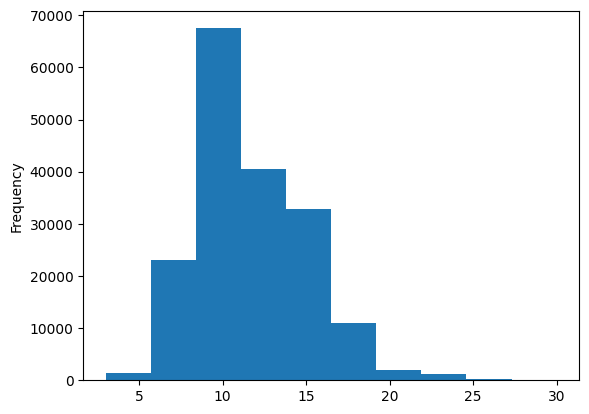

In [ ]:
# Cümle uzunluklarının dağılımı
train_df.total_lines.plot.hist();

In [ ]:
# Özet metin satırlarını listelere dönüştürün
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

# tolist() bir veri penceresi içeriğini Python list formatına dönüştürür
# Örn. her bir satırdaki cümleler ['This is a test.', 'Another sentence.', 'Final sentence.'] olur

(180040, 30212, 30135)

In [ ]:
# Eğitim cümlelerinin ilk 10 satırını görüntüleyin
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### **2.5. Tek Sıcak Kodlayıcı İle Sayısal Etiketler**

TensorFlow'un CategoricalCrossentropy kayıp işlevi, one hpt encoding etikete sahip olmalı.

Etiketleri sayısal olarak kodlamak için Scikit-Learn'in OneHotEncoder ve LabelEncoder sınıflarını kullanacağız.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Aşağıdaki kod öbekleri için;

***Sparse*** yeni versiyonda gelen bir özellik, varsayılan true'dir. False yaptığımızda hata vermedi, True olduğunda matris uzunluğu belirsiz uyarısı alındı.

Onehotencoder iki boyutludur, doğru şekilde veri olmazsa şeklini (-1,1) yap uyarısı alırsın. Bu yüzden kod satırına eklendi.

val_labels_one_hot  --> Doğrulama hedef etiketlerimizi aynı şekilde dönüştürmek için yalnızca dönüştürülmüş yöntemi kullanmamız gerekiyor. Yani bulunan eğitim veri çerçevesinden etiketlerin yapısını alınır ve doğrulama veri çerçevesini aynı şekilde kodlar.

In [ ]:
# One hot encode etiketleri
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Eğitim etiketlerinin nasıl göründüğünü kontrol edin
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

`One-hot encoding` (ya da bir diğer adıyla tek-sıcak kodlama), kategorik değişkenlerin sayısal verilere dönüştürülmesi için yaygın olarak kullanılan bir tekniktir. Bu teknik, modelin kategorik verileri sayısal formatta anlamasını sağlamak için kullanılır.

`One-hot encoding`, kategorik verileri ikili (binary) bir vektöre dönüştürme işlemidir. Bu işlem, her bir kategori için ayrı bir sütun oluşturur ve sadece o kategoriye ait olan satırda 1 değeri, diğer tüm kategorilerde ise 0 değeri bulunur. Yani, her kategori için "1" bir yerleştirilir, geri kalan yerler "0" olur.

Örneğin, bir etiket sütununda aşağıdaki kategoriler varsa:
```
["cat", "dog", "fish", "dog", "cat"]
```

Bu, `One-hot encoding` uygulandıktan sonra şöyle bir yapıya dönüşür:
```
cat   -> [1, 0, 0]
dog   -> [0, 1, 0]
fish  -> [0, 0, 1]
dog   -> [0, 1, 0]
cat   -> [1, 0, 0]
```

Her kategori için bir sütun eklenir (örneğin, "cat", "dog", "fish") ve her satırda bu kategorilerden birine 1 değeri atanır, diğerleri 0 olur.

---

```python
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
```

1. **`OneHotEncoder`**: `sklearn.preprocessing` modülünden `OneHotEncoder` sınıfını içeri aktarıyoruz. Bu sınıf, kategorik verileri one-hot encoding formatına dönüştürmek için kullanılır.

   - **`sparse=False`**: Bu parametre, dönüşümün **sparse matrix** (seyrek matris) yerine normal bir numpy dizisi (dense array) formatında yapılmasını sağlar. Sparse matrisler bellek tasarrufu sağlasa da, burada genellikle dense (yoğun) diziler tercih edilir.

---

```python
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))
```

2. **`fit_transform` ve `transform`**:
   - **`fit_transform`**: Bu metod, eğitim verisinde (train) `OneHotEncoder`'ı uygular ve aynı zamanda bu verilerle yeni kodlamayı öğrenir. `train_df["target"]` etiketlerini one-hot encoding formatına dönüştürür.
   - **`transform`**: Bu metod, eğitim verisiyle öğrenilen kodlamayı kullanarak, doğrulama (val) ve test (test) etiketlerine one-hot encoding uygular.

3. **`to_numpy().reshape(-1, 1)`**:
   - `train_df["target"]`: Bu, `train_df` DataFrame'inin "target" adlı etiket sütununu alır.
   - `.to_numpy()`: Pandas Series'i numpy dizisine dönüştürür.
   - `.reshape(-1, 1)`: Bu işlem, veriyi iki boyutlu bir vektöre dönüştürür (örneğin, 2D şekli `(n, 1)` yapar, burada `n` satır sayısını temsil eder). `OneHotEncoder` sadece 2D verilerle çalışır, bu yüzden bu dönüşüm gereklidir.

---

**Eğitim Etiketlerinin Görünümü**

```python
train_labels_one_hot
```
Bu satır, eğitim etiketlerinin one-hot encoding uygulanmış halini gösterir. Örneğin, eğer `train_df["target"]` 3 farklı kategori içeriyorsa (örneğin, `["cat", "dog", "fish"]`), `train_labels_one_hot` şu şekilde bir numpy array olabilir:

```python
array([[1., 0., 0.],  # cat
       [0., 1., 0.],  # dog
       [0., 0., 1.]]) # fish
```

Her satır, orijinal etiketin one-hot encoding karşılığıdır.

---

In [ ]:
# Etiketleri ("hedef" sütunlar) çıkarın ve bunları tam sayılara kodlayın
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Eğitim etiketlerinin nasıl göründüğünü kontrol edin
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

`Label Encoding` (Etiket Kodlama), kategorik verilerin sayısal verilere dönüştürülmesinin bir başka yaygın yoludur. Bu, kategorik etiketlerin her birini tek bir sayıya dönüştürmek için kullanılır. Bu işlem, **sınıflandırma problemlerinde** modelin sayısal verileri anlaması için gereklidir.

`Label Encoding`, her kategoriyi bir sayıya dönüştürür. Örneğin, "cat", "dog", "fish" gibi etiketler sırasıyla 0, 1, 2 gibi sayılarla değiştirilir.

Bu işlem genellikle **etiketlerin sıralı olduğu** durumlarda kullanılır. Yani, etiketler arasında bir sıralama veya hiyerarşi varsa, `Label Encoding` mantıklı olabilir. Ancak, sırasız etiketlerde de kullanılabilir, ancak bu durumda sıralamanın modelin performansını etkilememesi için dikkatli olunması gerekir.

Örnek:
- "cat" -> 0
- "dog" -> 1
- "fish" -> 2

---

```python
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
```

1. **`LabelEncoder`**: Bu sınıf, **kategorik etiketleri** sayısal verilere dönüştürmek için kullanılır. `LabelEncoder`, her farklı kategoriyi (etiketi) bir sayı ile eşler.

```python
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
```

2. **`fit_transform`**:
   - **`fit_transform`**: Bu metot, `train_df["target"]` sütunundaki tüm etiketleri (kategorik veriler) öğrenir (fit) ve her etiketi bir sayıya dönüştürür (transform).
   - `train_df["target"].to_numpy()`: Bu, `train_df` DataFrame'inin `target` adlı sütununu bir numpy dizisine dönüştürür. `LabelEncoder`, numpy dizileri ile çalışır, bu yüzden verinin bu formata dönüştürülmesi gereklidir.
   - Sonuçta, her etiketin sayısal karşılığı olan bir numpy dizisi elde edilir.

```python
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())
```

3. **`transform`**:
   - **`transform`**: Bu metod, eğitim verisiyle (`fit`) öğrenilen kodlamayı kullanarak **doğrulama (val)** ve **test (test)** setlerindeki etiketleri sayılara dönüştürür.
   - Burada önemli olan, `fit_transform` sadece eğitim verisinde yapılırken, doğrulama ve test verisinde sadece `transform` kullanılır. Bu, modelin **gerçek test verisi**yle karşılaşmadan önce öğrenme işleminin bitmesini sağlar.

---

 `train_labels_encoded` Nasıl Görünür?

`train_labels_encoded` dizisi, `train_df["target"]` etiketlerinin sayısal karşılıklarını içerir. Örneğin, eğer `train_df["target"]` şu etiketleri içeriyorsa:

```
["cat", "dog", "fish", "dog", "cat"]
```

Ve `LabelEncoder` bunları şu şekilde sayılara dönüştürürse:
```
cat -> 0
dog -> 1
fish -> 2
```

O zaman `train_labels_encoded` şu şekilde olur:

```python
array([0, 1, 2, 1, 0])
```

Burada her etiketin sayısal karşılığı gösterilmektedir.

---

`Label Encoding` çeşitli sebeplerle kullanılır:

1. **Makine Öğrenmesi Modellerinin Sayısal Veri İhtiyacı**: Çoğu makine öğrenmesi algoritması (özellikle doğrusal modeller ve karar ağaçları) kategorik verileri doğrudan işleyemez. Bu nedenle, kategorik etiketlerin sayısal verilere dönüştürülmesi gerekir.

2. **Kategorik Değişkenlerin Kodlanması**: Eğer verinizde kategorik etiketler varsa, bunların sayısal bir forma dönüştürülmesi gereklidir. `LabelEncoder`, her farklı kategoriyi benzersiz bir sayıya dönüştürür.

3. **Sıralı Veriler İçin**: Eğer etiketler sıralı ise (örneğin, düşük, orta, yüksek gibi), `Label Encoding` kullanmak anlamlıdır çünkü her kategoriye bir sıra numarası atar. Örneğin, bir müşteri memnuniyetini 1, 2, 3 olarak kodlamak uygun olabilir.

4. **Bellek ve Hesaplama Verimliliği**: `One-hot encoding`'de her kategori için ayrı bir sütun oluşturulurken, `Label Encoding` sadece tek bir sütun kullanır. Bu, veri setinin boyutunu küçültür ve bellek kullanımı açısından daha verimli olabilir. Ancak, `Label Encoding` bazen etiketler arasındaki ilişkiyi yanlış anlamaya yol açabilir.

---

 `Label Encoding` ve `One-hot Encoding` Farkı:

- **`Label Encoding`**: Her kategoriyi bir sayıya dönüştürür. Genellikle sıralı verilerde kullanılır ve kategoriler arasında gizli sıralama ilişkileri oluşturabilir.
  
  Örnek:
  ```
  ["cat", "dog", "fish"]
  --> [0, 1, 2]
  ```

- **`One-hot Encoding`**: Her kategoriyi ikili vektörler ile temsil eder. Kategoriler arasındaki ilişkiyi temsil etmez ve her kategori bağımsız olarak işlenir.
  
  Örnek:
  ```
  ["cat", "dog", "fish"]
  --> [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
  ```

In [ ]:
# LabelEncoder örneğinden sınıf adlarını ve sınıf sayısını alın
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

Bu kod, **LabelEncoder** tarafından kodlanan sınıf etiketlerini ve toplam sınıf sayısını almak için kullanılır. Şimdi kodu daha ayrıntılı şekilde açıklayalım:

```python
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names
```

1. **`label_encoder.classes_`**:
   - **`LabelEncoder`** sınıfının `.classes_` özelliği, etiketlerin **sayısal formda** kodlanmış hallerini, **orijinal kategorik etiketler** olarak içerir.
   - Bu özellik, eğitim verisi üzerinde `fit()` metodu çalıştırıldıktan sonra doldurulur ve her bir sınıfın (etiketin) sırasıyla **sıfırdan başlayarak numaralandığı** sınıf adlarını içerir.
   - Örneğin, `LabelEncoder` ile "cat", "dog", "fish" etiketlerini kodladığınızda, `label_encoder.classes_` şu şekilde olur:
     ```python
     array(['cat', 'dog', 'fish'])
     ```

2. **`len(label_encoder.classes_)`**:
   - Bu ifade, **`label_encoder.classes_`**'deki öğelerin sayısını döndürür. Yani, **kaç farklı sınıf** olduğunu verir.
   - Örneğin, eğer `classes_` şöyleyse:
     ```python
     array(['cat', 'dog', 'fish'])
     ```
     Burada 3 sınıf olduğu için, `num_classes` değeri `3` olacaktır.

3. **`class_names = label_encoder.classes_`**:
   - Bu satır, **sınıf adlarını** (`classes_`) bir değişkene atar. Yani, etiketlerin orijinal hallerini `class_names` değişkenine kaydeder.
   - Eğer `classes_` array'ı şu şekildeyse:
     ```python
     array(['cat', 'dog', 'fish'])
     ```
     O zaman `class_names` şu değeri alır:
     ```python
     array(['cat', 'dog', 'fish'])
     ```

4. **`num_classes, class_names`**:
   - Son olarak, bu iki değeri döndürür:
     - `num_classes`: Toplam sınıf sayısını verir.
     - `class_names`: Etiketlerin orijinal, kategorik isimlerini verir.

   Bu kodun çıktısı şu şekilde olur:

   ```python
   num_classes = 3
   class_names = ['cat', 'dog', 'fish']
   ```

---

### Örnek:

Varsayalım ki etiketleriniz şu şekilde:
```
["cat", "dog", "fish"]
```

`LabelEncoder` bunları sırasıyla şu şekilde kodlar:
```
0 -> cat
1 -> dog
2 -> fish
```

Kod çalıştığında:
- `num_classes` değeri `3` olur (çünkü üç farklı sınıf var).
- `class_names` değeri şu şekilde olur:
  ```python
  array(['cat', 'dog', 'fish'])
  ```

Bu sayede, modelin tahminlerinin geri dönüştürülmesi ve anlaşılabilir hale getirilmesi kolaylaşır.

# **3. Modelleme**

Medikal çalışmasının kaynağı --> https://arxiv.org/pdf/1612.05251

### **3.1. Model 0 Temel Model Yazımı ve Değerlendirilmesi**

İlk modelimiz, Scikit-Learn'in makine öğrenimi haritası tarafından önerildiği gibi bir TF-IDF Multinomial Naive Bayes modelidir. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Bunu oluşturmak için, TF-IDF (terim frekansı-ters belge frekansı) algoritmasını kullanarak soyut cümlelerimizi sayılara dönüştürmek için TfidfVectorizer sınıfını kullanan bir Scikit-Learn Pipeline oluşturacağız ve ardından MultinomialNB agloritm'i kullanarak cümlelerimizi sınıflandırmayı öğreneceğiz.

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Boru hattı oluştur
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Eğitim verilerini boru hattına uydur
model_0.fit(X=train_sentences,
            y=train_labels_encoded);

CPU times: user 3.05 s, sys: 39.5 ms, total: 3.09 s
Wall time: 3.1 s


Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Değerlerinde verileri üzerindeki bu modeli değerlendir
model_0.score(
    X = val_sentences,
    y = val_labels_encoded
)

0.7218323844829869

In [ ]:
# Tahminler yap
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([4, 1, 3, 2, 2, 2, 2, 2, 4, 4, 0, 4, 1, 1, 2, 2, 4, 1, 4, 4])

`from sklearn.feature_extraction.text import TfidfVectorizer`
- **TfidfVectorizer**: Bu, metin verilerini sayısal verilere dönüştüren bir vektörleştirici (vectorizer) sınıfıdır. "TF-IDF" (Term Frequency-Inverse Document Frequency) yöntemi, her terimin önemini hesaplarken, terimin bir belgedeki sıklığını (TF) ve tüm koleksiyon içindeki nadirliğini (IDF) göz önünde bulundurur. Bu sayede önemli ve nadir kelimelere yüksek ağırlık verilir.
- **Amaç**: Doğal dildeki metni makine öğrenimi modelinin anlayacağı sayısal verilere dönüştürmek.

`from sklearn.naive_bayes import MultinomialNB`
- **MultinomialNB**: Bu, Naive Bayes sınıflandırıcılarının bir çeşididir. Özellikle metin verileri gibi çok terimli (multinomial) verilerle çalışmak için uygundur. Her bir belgeyi, o belgenin hangi sınıfa ait olduğunu tahmin etmek için kullanır.
- **Amaç**: Metin verilerini belirli bir kategoriye (sınıfa) sınıflandırmak. Örneğin, bir e-postanın spam olup olmadığını tahmin etmek.

`from sklearn.pipeline import Pipeline`
- **Pipeline**: Bu, bir dizi adımı sırasıyla birleştiren bir sınıftır. Bir boru hattı (pipeline), veriyi işlemek için gereken tüm adımları (veya işlemleri) sıralı şekilde organize eder. Yani, bu yapıyı kullanarak, veri hazırlık aşamasından modelin eğitilmesine kadar her şeyi bir arada tutabilirsiniz.
- **Amaç**: Veriyi ve modeli düzenli bir şekilde işlemeyi sağlayan bir "boru hattı" oluşturmak.

`model_0 = Pipeline([("tf-idf", TfidfVectorizer()), ("clf", MultinomialNB())])`
- **Bu satırda**:
  - Bir **pipeline** oluşturuluyor. Bu boru hattı, iki adım içeriyor:
    1. **"tf-idf"**: İlk adımda metin verilerini, `TfidfVectorizer` kullanarak sayısal verilere dönüştürmek.
    2. **"clf"**: İkinci adımda, dönüştürülmüş veriyi `MultinomialNB` sınıflandırıcısına vererek sınıflandırmak.
- **Amaç**: Veriyi sayısal hale getirdikten sonra, bu sayısal veriyi kullanarak bir sınıflandırma yapmak.

`model_0.fit(X=train_sentences, y=train_labels_encoded)`
- **fit**: Modeli eğitim verileriyle (X) ve etiketleriyle (y) eğitir. Bu adımda:
  - `X` (train_sentences): Eğitim verisi, yani metinleri içeren bir liste veya dizi.
  - `y` (train_labels_encoded): Eğitim verilerine karşılık gelen etiketler. Bu, her bir metne hangi sınıfın (etiketin) ait olduğunu gösterir. Örneğin, bir metnin "spam" veya "ham" (spam değil) olduğunu belirten etiketler olabilir.
  
- **Amaç**: Model, eğitim verilerini kullanarak metinlerin hangi sınıfa ait olduğunu öğrenir. İlk adımda metinleri sayısal verilere dönüştürür, sonra ikinci adımda bu sayısal veriyi sınıflandırıcıya verir ve öğrenme işlemi başlar.

### **3.2. Yardımcı Fonksiyonlar Dosyası**

Temel modelin tahminlerini değerlendirmek için önceden hazırlanmış helper_functions.py komut dosyasını içeri aktaracağız. Bu dosya içerisinde calculate_results() işlevi ile değerlendirme yaparız.

Daha spesifik olarak calculate_results() işlevi aşağıdakileri elde etmemize yardımcı olacaktır:

* Accuracy
* Precision
* Recall
* F1 Score

In [ ]:
# Yardımcı işlevler komut dosyasını indirin
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-01-02 19:30:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-01-02 19:30:13 (14.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
### İçe aktarılmış olan yardımcı fonksiyonların detayları

import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

# Create function to unzip a zipfile into current working directory
# (since we're going to be downloading and unzipping a few files)
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# calculate_results'u yardımcı fonksiyonlardan içeri aktarma
from helper_functions import calculate_results

# Temel modelin sonuçları nedir?
baseline_results = calculate_results(
    y_true = val_labels_encoded,
    y_pred = baseline_preds
)

baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### **3.3. Derin Modelleme İçin Veri Hazırlığı**

Etiketleri sayısal formatta hazırlamıştık, şimdi metinleri sayısal biçime dönüştürmek için çalışma yapmalıyız, metin vektörleştirme. Her bir token bir sayıya dönüştürülür ve bu birleştirilmiş kelimelere dayalı bir embeddings oluşturulur. Denemek ve geliştirmek için çalışma temelimiz var.

Ancak daha derin modeller oluşturmaya başlamadan önce, vektörleştirme ve katmanları gömme oluşturmalıyız.

Vektörleştirme katmanı metnimizi sayılara dönüştürecek ve gömme katmanı bu sayılar arasındaki ilişkileri yakalayacaktır.

Vektörleştirme ve gömme katmanlarımızı oluşturmaya başlamak için uygun kitaplıkları (yani TensorFlow ve NumPy) içe aktarmamız gerekecek.

Cümlelerimizi sayılara dönüştüreceğimiz için, her cümlede kaç kelime olduğunu bulmak gerekir.

Modelimiz cümlelerimizden geçtiğinde, hepsi aynı uzunlukta olduğunda en iyi şekilde çalışır (bu, aynı boyutta tensörlerde gruplar oluşturmak için önemlidir).

Örneğin, bir cümle sekiz kelime uzunluğunda ve diğeri 29 kelime uzunluğundaysa, sekiz kelimelik cümleyi sıfırla doldurmak istiyoruz, böylece 29 kelimelik cümle ile aynı uzunlukta olur.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Her cümle ortalama ne kadar uzunlukta? Dağılım hakkında bilgimiz olmalı
# Bir cümle 4 kelime iken diğeri 90 kelime de olabilir
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)

avg_sent_len # ortalama cümle uzunluğunu döndür (belirteç cinsinden)

26.338269273494777

`sent_lens = [len(sentence.split()) for sentence in train_sentences]`
- Bu satırda, eğitim verisindeki her cümle için kelime sayısı hesaplanıyor.
- `train_sentences`: Bu, eğitim verisindeki cümlelerin bir listesidir. Her bir öğe bir cümledir.
- `sentence.split()`: Bu, her cümleyi boşluk karakterine göre böler ve cümledeki kelimeleri bir liste olarak döndürür. Örneğin, `"Bu bir test cümlesidir."` cümlesi `["Bu", "bir", "test", "cümlesidir."]` olarak bölünür.
- `len(sentence.split())`: Bu, her cümlenin kelime sayısını hesaplar. Örneğin, `"Bu bir test cümlesidir."` cümlesi 4 kelime içerdiği için `len(sentence.split())` değeri 4 olacaktır.
- **Amaç**: Her cümlenin kelime sayısını içeren bir liste (`sent_lens`) oluşturmak.

`avg_sent_len = np.mean(sent_lens)`
- **`np.mean(sent_lens)`**: NumPy kütüphanesinin `mean` fonksiyonu, `sent_lens` listesindeki tüm cümlelerin kelime sayılarının ortalamasını hesaplar.
- **Amaç**: Cümlelerin ortalama kelime sayısını bulmak.

Örnek:
- Diyelim ki `train_sentences` şöyle:
  ```python
  train_sentences = [
      "Merhaba.",
      "Bugün çok güzel bir gün.",
      "Yapay zeka, veri biliminde önemli bir yer tutmaktadır. Çeşitli alanlarda kullanılmaktadır."
  ]
  ```
- İlk cümlede 1 kelime var, ikinci cümlede 5 kelime var, üçüncü cümlede ise 10 kelime var.
- `sent_lens` listesi: `[1, 5, 10]`
- Ortalama cümle uzunluğu (`avg_sent_len`) hesaplanır: `(1 + 5 + 10) / 3 = 5.33` (yaklaşık)

Sonuç olarak, ortalama cümle uzunluğu yaklaşık 5.33 kelime olacaktır.

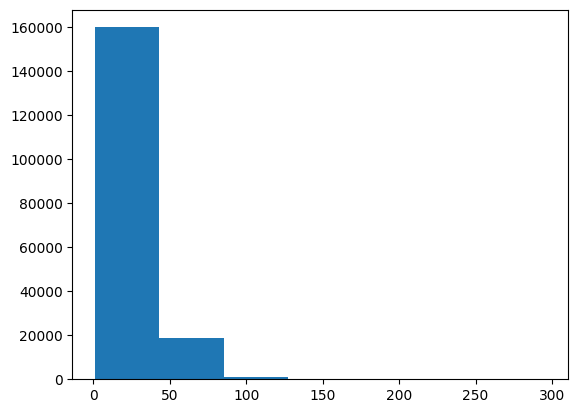

In [ ]:
# Dağılım nasıl?
plt.hist(sent_lens, bins = 7);

Cümlelerin büyük çoğunluğunun uzunluğu 0 ile 50 token arasında gibi görünüyor.

Cümle uzunluklarının %95'ini kapsayan değeri bulmak için NumPy'nin yüzdelik dilimini kullanabiliriz.

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

🤔 Soru: Neden %95?

Eğitim setindeki cümlelerin maksimum cümle uzunluğunu kullanabiliriz.

Sonuç 55 çıkar (aşağıda). Belirteç katmanımızı oluşturduğumuzda, tüm cümlelerimizi aynı uzunlukta dönüştürmek için bu değeri kullanacağız. Uzunluğu 55'in altında olan cümleler sıfırlarla doldurulur ve uzunluğu 55'in üzerinde olan cümleler kesilir (55'ten sonraki kelimeler kesilir).

In [ ]:
# Bir cümlenin uzunluğu, uzunlukların %95'ini kapsıyor?
output_seq_len = int(np.percentile(sent_lens, 95))

output_seq_len # çıktımızın uzunluğunu döndür

55

In [ ]:
# Eğitim veri setindeki maksimum cümle uzunluğu
max(sent_lens)

296

🔑 Not: Bir NLP sorunu için bir metin külliyatı ile çalışırken attığımız adımlar iyi bir uygulamadır. Numunelerinizin ne kadar uzun olduğunu ve bunların dağılımının ne olduğunu bilmek istiyorsunuz. Daha fazla örnek için bkz. bölüm 4 PubMed 200k RCT makalesinin Veri Analizi. https://arxiv.org/pdf/1710.06071

### **3.4. Metin Vektörleştirme**

Metinleri sayıya dönüştürmeliyiz, TensorFlow'dan TextVectorization katmanını kullanmalıyız.

Max_tokens (veri kümemizdeki benzersiz kelimelerin sayısı) ve output_sequence_length (her vektörleştirilmiş cümle için istediğimiz çıktı uzunluğu) hariç tüm parametreleri varsayılan tutacağız.

PubMed 200k RCT makalesinin 3.2. Bölümü, PubMed 20k veri kümesinin kelime boyutunu 68.000 olarak belirtir. Yani bunu max_tokens parametremiz olarak kullanacağız. https://arxiv.org/pdf/1710.06071

***Tokenization ile embedding arasındaki fark, embedding daha zengin bir temsildir. Örneğin embedding, eğitim verilerinden geçerken her kelime için üç boyutlu bir vektör oluşturulabilir. Tüm bu değerler, metnimizdeki kelimelerin modelimiz olarak birbirleriyle nasıl ilişkili olduğunu öğrenebilir.***

***Tokenization, her kelime bir int rakam olabilir, one hot encoding ile 010, 100, 001 gibi matris olabilir. Embedingste 0-1 arası rakamlardan oluşan 3x3 matris oluşabilir.***

In [ ]:
# Kelime dağarcığımızda kaç kelime var? (doküman 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

In [ ]:
# Metin vektörleştirici oluştur
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens = max_tokens,       # kelime hazinesindeki kelime sayısı
    output_sequence_length = 55    # vektörleştirilmiş dizilerin istenen çıktı uzunluğu
)

* Modelin eğitilmesi sırasında daha küçük max_tokens değerleri kullanmak, işlem gücünü azaltabilir ve eğitim süresini hızlandırabilir. Ancak, çok düşük bir max_tokens değeri, önemli kelimelerin kaybolmasına neden olabilir.
* Yaygın olarak, max_tokens değeri 10,000 ile 50,000 arasında bir aralıkta seçilir, ancak bu sayılar veri setinizin büyüklüğüne bağlı olarak değişebilir.

`max_tokens` Değerini Belirlemek için Yöntemler

1. **Kelime Frekansına Dayalı Seçim**
Bir yöntem, eğitim verinizdeki kelimelerin frekansını hesaplamak ve en sık kullanılan belirli sayıda kelimeyi seçmektir. Örneğin, `max_tokens`'ı eğitim setinizdeki en sık 10,000 kelimeye sınırlayabilirsiniz.

```python
from tensorflow.keras.layers import TextVectorization
import numpy as np

# Verinizin kelimelerini tokenize edin
all_words = ' '.join(train_sentences)  # Tüm cümleleri birleştir
word_list = all_words.split()  # Tüm kelimelere ayır

# Kelime sıklığını hesapla
word_counts = {word: word_list.count(word) for word in set(word_list)}

# Kelime sıklığına göre en sık geçen 10,000 kelimeyi seç
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words = sorted_words[:10000]

# max_tokens olarak en sık geçen kelimeler sayısını belirleyebilirsiniz
max_tokens = len(most_common_words)
```

2. **Veri Setindeki Kelimeleri Sayarak**
Veri setindeki kelimeleri sayarak doğrudan `max_tokens` değerini hesaplayabilirsiniz. Örneğin, toplamda kaç farklı kelime olduğunu bulabilir ve bunun bir yüzdesi olarak `max_tokens` belirleyebilirsiniz.

```python
from collections import Counter

# Tüm metni birleştir
all_words = ' '.join(train_sentences)
words = all_words.split()

# Kelime sayısını ve farklı kelimelerin sayısını hesapla
word_counts = Counter(words)
unique_words = len(word_counts)

# `max_tokens`'ı veri setindeki benzersiz kelimelerin sayısına göre belirleyebilirsiniz
max_tokens = unique_words  # Örneğin tüm benzersiz kelimeler kullanılabilir
```

3. **Pratik Bir Yaklaşım**
Eğer elinizde büyük bir veri seti varsa ve fazla işlem gücü harcamak istemiyorsanız, genel bir yaklaşım olarak `max_tokens`'ı 10,000 ile 50,000 arasında seçebilirsiniz. Bu, çoğu metin sınıflandırma modelinde yeterince iyi bir başlangıç noktasıdır.

```python
# Örnek olarak max_tokens değeri
max_tokens = 10000  # veya 5000, 20000 gibi
```

Şimdi metin vektörleştiriciyi eğitim verilerine uyarlayalım (eğitim verilerini okusun ve hangi sayının hangi kelimeyi temsil etmesi gerektiğini bulsun) ve ardından test edelim.

Bunu test verilerindeki doğrulamaya uyarlarsak, bu veri kümelerinin görünmemesi amaçlanmıştır. Böylece eğitim verilerine uyum sağladık ve daha sonra doğrulama ve test verilerimize sığdırabiliriz.

In [ ]:
# Metin vektörleştiricisini eğitim cümlelerine uyarlayın
text_vectorizer.adapt(train_sentences)

In [ ]:
# Metin vektörleştiricisini test edin
import random
target_sentence = random.choice(train_sentences)
print(f"Metin:\n{target_sentence}")
print(f"\nMetin Uzunluğu: {len(target_sentence.split())}")
print(f"\nVektörleşmiş Metin:\n{text_vectorizer([target_sentence])}")

Metin:
among accord lipid trial participants , the occurrence of extremely low hdl-c ever during study follow-up was @ % higher among those randomized to fenofibrate ( @ % fenofibrate vs. @ % placebo , p < @ ) .

Metin Uzunluğu: 39

Vektörleşmiş Metin:
[[ 116 9495  864   32   60    2 1066    4 3945  220 2784 6099   52   17
    94   10   82  116  125   29    6 7078 7078   44   48   14    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# Eğitim sözlüğümüzde kaç kelime var?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Sözlükteki kelime sayısı: {len(rct_20k_text_vocab)}"),
print(f"Sözlükteki en çok tekrar eden kelime: {rct_20k_text_vocab[:5]}")
print(f"Sözlükte en az tekrar eden kelime: {rct_20k_text_vocab[-5:]}")

Sözlükteki kelime sayısı: 64841
Sözlükteki en çok tekrar eden kelime: ['', '[UNK]', 'the', 'and', 'of']
Sözlükte en az tekrar eden kelime: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Metin vektörleştiricimizin yapılandırmasını edinin
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### **3.5. Gömme Hazırlama**

Belirteç_vektörleştirme katmanımız, metnimizdeki kelimeleri doğrudan sayılarla eşler. Ancak, bu mutlaka bu sayılar arasındaki ilişkileri yakalamaz.

Metnimizin daha zengin bir sayısal temsilini oluşturmak için bir gömme kullanabiliriz. https://www.tensorflow.org/text/guide/word_embeddings?hl=tr

Modelimiz öğrendikçe (birçok farklı soyut cümle örneğini ve etiketlerini gözden geçirerek), külliyatımızdaki belirteçler arasındaki ilişkileri daha iyi temsil etmek için gömmesini güncelleyecektir.

TensorFlow'un Gömme katmanını kullanarak eğitilebilir bir gömme katmanı oluşturabiliriz.

Bir kez daha, burada ilgilendiğimiz ana parametreler, Gömme katmanımızın giriş ve çıkışlarıdır.

Input_dim parametresi kelime dağarcığımızın boyutunu tanımlar. Ve output_dim parametresi, gömme çıktısının boyutunu tanımlar.

Bir kez oluşturulduktan sonra, gömme katmanımız text_vectorization katmanımızın tamsayı çıktılarını girdi olarak alacak ve bunları output_dim boyutu vektörlerine dönüştürecektir.

**Genel Notlar**
- output dim --> 32,64, 128'in gibi 8'in katları olmalı.
- Her ne kadar büyük gömülürse modelin eğitmesi gereken parametre sayısı o kadar fazla olur.
- mask_zero: Boolean değerdir. input_value=0. Özel bir padding. RNN kullanımı çeşitli uzunlukta giriş verileri kullanılırken elverişlidir. Eğer true ise modeldeki tüm subsequent katmanlar maskelenmeli. Daha verimli hesaplama için TRUE olmalı.
- Çıktıyı incele, çok sıfır var o zaman verimli bir model (one_hot benzeri).
- token_embeding --> Token yerleştirme katmanına herhangi bir şey aktarmadan önce bunun sayısal biçimde olması gerekli.
- Gömülü cümle şeklinde her bir dizi uzunluğunda rakamlardan 55 adet var her biri 128 vektör uzunluğunda.

In [ ]:
# Gömme katmanı oluştur (aslında input_dim ve output_dim yeterli, listeyi uzatadabilirsin)
token_embed = layers.Embedding(
    input_dim = len(rct_20k_text_vocab), # kelime uzunluğu
    output_dim = 128,                    # farklı yerleştirme boyutları, eğitilecek parametrelerin büyük ölçüde farklı olmasına neden olur
    mask_zero = True,                    # Değişken dizi uzunluklarını işlemek için maskelemeyi kullanın (yerden tasarruf edin)
    name = "token_embedding"
)

# Örnek gömmelerin gösterimi
print(f"Vektörleşme öncesi cümleler:\n{target_sentence}\n")

vectorized_sentence = text_vectorizer([target_sentence])
print(f"Vektörleşme sonrası cümle (gömme öncesi):\n{vectorized_sentence}\n")

embedded_sentence = token_embed(vectorized_sentence)
print(f"Gömme sonrası cümle:\n{embedded_sentence}\n")
print(f"Gömülmüş cümle şekli: {embedded_sentence.shape}")

Vektörleşme öncesi cümleler:
among accord lipid trial participants , the occurrence of extremely low hdl-c ever during study follow-up was @ % higher among those randomized to fenofibrate ( @ % fenofibrate vs. @ % placebo , p < @ ) .

Vektörleşme sonrası cümle (gömme öncesi):
[[ 116 9495  864   32   60    2 1066    4 3945  220 2784 6099   52   17
    94   10   82  116  125   29    6 7078 7078   44   48   14    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Gömme sonrası cümle:
[[[ 0.0450269   0.03514195 -0.0080569  ...  0.00595022 -0.03892398
    0.04339631]
  [ 0.0489152   0.03578948  0.03945035 ... -0.03081435 -0.00316496
    0.04754409]
  [-0.00370265  0.04541652  0.04479161 ...  0.01556161  0.02524466
    0.00633305]
  ...
  [-0.02776702 -0.03965263  0.04264294 ... -0.03421847  0.01198611
   -0.02226293]
  [-0.02776702 -0.03965263  0.04264294 ... -0.03421847  0.01198611
   -0.02226

1. **`input_dim`**:
   - **Tanım**: Gömme katmanına giren veri boyutunu belirtir. Bu, kelime veya token sayısına eşittir.
   - **Özellik**: Burada `len(rct_20k_text_vocab)` değeri, kelime dağarcığındaki toplam kelime sayısını temsil eder.

2. **`output_dim`**:
   - **Tanım**: Gömme vektörlerinin boyutu. Yani, her token için kaç boyutlu bir vektör elde edileceğini belirtir.
   - **Özellik**: Bu örnekte, her token için 64 boyutlu bir vektör kullanılacaktır.

3. **`name`**:
   - **Tanım**: Katmana bir isim verir. Bu genellikle modelin özelliklerini daha okunabilir hale getirmek için kullanılır.
   - **Özellik**: Burada katmanın adı `token_embedding` olarak belirlenmiş.

4. **`mask_zero`**:
   - **Tanım**: Bu parametre, girişteki sıfırların (yani genellikle padding token'larının) göz ardı edilip edilmeyeceğini belirtir. Eğer `True` ise sıfır olan input değerleri maskelenir.
   - **Özellik**: Bu durumda, sıfır olan değerler (padding) gömme katmanına dahil edilmez.

5. **`input_length`**:
   - **Tanım**: Gömme katmanına giren dizilerin uzunluğunu belirtir. Bu, giriş verisinin sabit bir uzunluğa sahip olduğunu varsayar.
   - **Özellik**: Burada, her giriş dizisinin uzunluğu 55 olarak belirlenmiş.

6. **`embeddings_initializer`**:
   - **Tanım**: Gömme katmanındaki vektörlerin başlangıç değerlerini belirler. `uniform`, değerlerin küçük rastgele sayılarla başlatılacağı anlamına gelir.
   - **Özellik**: Bu, genellikle ağırlıkların rastgele bir şekilde başlangıçta dağıtılması için kullanılır.

7. **`trainable`**:
   - **Tanım**: Gömme katmanının eğitilebilir olup olmadığını belirtir. Eğer `True` ise, gömme katmanındaki ağırlıklar (embedding vektörleri) eğitilebilir (yani öğrenilebilir).
   - **Özellik**: Burada, gömme katmanı eğitilebilir olarak ayarlanmış.

8. **`activity_regularizer`**:
   - **Tanım**: Aktivite düzenleyici, katmanın çıktılarına uygulanan bir L2 ceza terimidir. Modelin daha az kompleks olmasını sağlamak için kullanılır.
   - **Özellik**: Bu, gömme katmanının çıktısına L2 ceza uygulanacağını belirtir.

9. **`embeddings_regularizer`**:
   - **Tanım**: Gömme katmanının ağırlıklarına uygulanan düzenleyicidir. Bu da L2 ceza terimi kullanarak ağırlıkların büyüklüğünü sınırlamaya yardımcı olur.
   - **Özellik**: Bu, gömme vektörlerinin regularizasyonu için L2 ceza uygulanır.

10. **`update_embedding`**:
    - **Tanım**: Bu parametre TensorFlow'un eski sürümlerinde kullanılabilir. Günümüzde bu parametre yerine `trainable=True` tercih edilmektedir.
    - **Özellik**: Bu, gömme katmanının ağırlıklarının güncellenip güncellenmeyeceğini kontrol eder. Ancak bu parametre artık yaygın olarak kullanılmaz.

11. **`input_shape`**:
    - **Tanım**: Katman için giriş verisinin şekli. Burada `(None, 55)` kullanılmış; `None` giriş batch boyutunun dinamik olduğunu belirtir, `55` ise her dizinin uzunluğunu belirtir.

12. **`dtype`**:
    - **Tanım**: Katmandaki verinin veri türünü belirtir. Genellikle `float32` kullanılır.
    - **Özellik**: Burada, veri türü olarak `float32` belirtilmiş.

---

- **`mask_zero=True`**: Eğer padding yapıyorsanız, sıfırların maskelenmesi önemli olabilir.
- **`embeddings_initializer`** ve **`trainable=True`**: Gömme katmanlarının başlangıçta rastgele başlatılmasını ve eğitilebilir olmasını istiyorsanız bunları kullanabilirsiniz.
- **`activity_regularizer`** ve **`embeddings_regularizer`**: Eğer overfitting'i engellemek için düzenleme (regularization) yapmak istiyorsanız bu parametreleri kullanabilirsiniz.

### **3.6. Veri Kümelerini hazırlama**

Bir makine öğrenimi modeliyle kullanılmak üzere veri kümelerimizi önceden işleme zahmetini yaşadık, ancak modellerimizle daha hızlı çalışmasını sağlamak için kullanabileceğimiz birkaç adım var.

Yani, tf.data API, daha hızlı veri yüklemesini sağlayan yöntemler sağlar.

📖 Kaynak: TensorFlow'da veri yüklemeyle ilgili en iyi uygulamalar için aşağıdakilere göz atın:

- tf.data: TensorFlow giriş boru hatları oluşturun https://www.tensorflow.org/guide/data?hl=tr

- tf.data API ile daha iyi performans https://www.tensorflow.org/guide/data_performance?hl=tr

Verilerimizle kullanmak isteyeceğimiz ana adımlar, onu bir PrefetchDataset gruplarına dönüştürmektir.

Bunu yaparak TensorFlow'un verilerimizi GPU'ya mümkün olduğunca hızlı bir şekilde yüklemesini ve daha hızlı eğitim süresine yol açmasını sağlayacağız.

Toplu bir PrefetchDataset oluşturmak için batch() ve prefetch() yöntemlerini kullanabiliriz, tf.data.AUTOTUNE parametresi ayrıca TensorFlow'un veri kümelerini hazırlamak için kullanılacak en uygun işlem miktarını belirlemesine izin verecektir.

* https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch
* https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch
* https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE

In [ ]:
# Verilerimizi TensorFlow Veri Kümelerine dönüştürün
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

# Hepsi etiket dizesidir.
# Eğitim veri seti, veri setini dilimleme eğilimindedir. Yani artık test veri kümelerindeki eğitim doğrulamalarındaki örneklerin her biri artık veri kümelerini dilimleme eğiliminde
# Çıktıdaki şekil (None, (5)) tuple tarzındadır. One hot eğitim verisi bir üst şekli etiketler

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

Bu kod, **TensorFlow veri kümesi (dataset)** oluşturma sürecini gösterir ve **TensorFlow'un `tf.data` API'si** kullanılarak verilerin model eğitimi için uygun bir formatta sunulmasını sağlar.

```python
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
```

- **`train_labels_one_hot`, eğitim, doğrulama ve test setlerindeki etiketlerin one-hot kodlanmış** haliyle temsil edilen değerlerdir. **One-hot kodlama**, her etiketin bir dizi elemanı olarak temsil edilmesini sağlar. Örneğin, 3 sınıflı bir problemde "2. sınıf" için `[0, 1, 0]` şeklinde bir kodlama yapılır.

`tf.data.Dataset.from_tensor_slices()` Fonksiyonu:

- **`from_tensor_slices()`**: Bu fonksiyon, **tensörler** veya **numpy dizileri** gibi veri yapılarını alır ve bunları **TensorFlow veri kümesine** dönüştürür. Her bir eleman (örneğin bir cümle veya etiket), verisetindeki bir **örnek** (sample) olur.
  
- Bu fonksiyonun temel amacı, verileri **efektif bir şekilde batch’lemek**, **karıştırmak (shuffle)**, **önceden işleme uygulamak** (örneğin, tokenize etmek) ve modelin eğitim sürecine uygun hale getirmektir.

Örneğin:

```python
train_sentences = ["Bu bir cümledir.", "Bu başka bir cümledir."]
train_labels_one_hot = [[1, 0], [0, 1]]
```

Bu verileri `from_tensor_slices()` ile dönüştürdüğümüzde, her cümle ve etiket bir çift (sentence, label) olarak gruplanır ve verisetinin bir parçası haline gelir.

```python
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
```

Bu işlem, her cümle ve etiketin bir arada olduğu bir **`tf.data.Dataset`** nesnesi oluşturur. Bu nesne, eğitim süreci için daha sonra kullanılabilir.

TensorFlow Veri Kümesi Nedir? Ne İşe Yarar?

**TensorFlow Veri Kümesi (Dataset)**, büyük ve karmaşık veri kümelerinin **verimli bir şekilde** işlenmesine olanak tanır. Bu nesne, modelin eğitim sürecinde çeşitli işlevler sunar:

1. **Veri Yükleme**: Büyük veri kümelerinin belleğe sığmayan kısımlarını verimli bir şekilde yükler.
  
2. **Batches (Gruplama)**: Verileri küçük gruplara ayırarak modelin her seferinde sadece bir kısmı ile çalışmasını sağlar. Bu, bellek kullanımını optimize eder.

3. **Shuffle (Karıştırma)**: Eğitim verilerini karıştırarak, modelin sıralamadan bağımsız olarak öğrenmesini sağlar ve overfitting (aşırı öğrenme) riskini azaltır.

4. **Prefetch (Önceden Yükleme)**: Veriler bir batch işlemi için hazır olduğunda, bir sonraki batch'in yüklenmesine başlar. Bu, CPU ve GPU arasında zaman kaybını azaltır ve modelin daha hızlı eğitilmesini sağlar.

5. **Transformations (Dönüştürme)**: Veri üzerinde dönüşümler (örneğin, normalizasyon, augmentation, veri temizleme) yapabilirsiniz.

Kullanımda Neden Gerekli?

TensorFlow veri kümesi, veriyi **yüksek performansla işlemek** için çok önemlidir çünkü:

- **Veri Akışını Yönetir**: `tf.data.Dataset`, veri setinin akışını yönetir ve veri üzerinde yapılan işlemleri (örneğin, batch'leme, karıştırma, dönüştürme) kolayca uygular.
  
- **Bellek Verimliliği**: Büyük veri kümeleriyle çalışırken, `Dataset` nesnesi belleğe tüm veriyi yüklemek yerine, veriyi parça parça işler ve belleği verimli kullanır.
  
- **Paralel İşlem**: TensorFlow, verisetini paralel işlem yapacak şekilde optimize edebilir, yani birden fazla iş parçacığıyla verileri işleyebilir. Bu, eğitim süresini hızlandırır.

- **Pipelines (Veri Boru Hatları)**: `tf.data.Dataset` ile veriyi doğrudan modelle beslemeden önce bir dizi işlem (tokenization, padding, vb.) uygulayabilirsiniz. Bu işlemleri düzenli ve yapılandırılmış bir şekilde yapmanıza olanak tanır.

---

In [ ]:
# TensorSliceDataset'leri alın ve bunları önceden getirilmiş gruplara dönüştürün
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Bu kod, daha önce oluşturduğunuz **`train_dataset`, `valid_dataset`,** ve **`test_dataset`** veri kümelerine iki önemli işlem uygular: **batch'leme** ve **prefetching**. Bu işlemler, eğitim sürecini daha verimli hale getirmek ve sistem kaynaklarını optimize etmek için kullanılır.

```python
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
```
1. **Batch'leme (`batch(32)`)**
- **`batch(32)`**: Bu, veri kümesindeki verileri küçük gruplara (batch'lere) ayırır. Buradaki `32`, her batch'teki örnek sayısını belirtir. Yani, model her seferinde **32 örneği** (cümleyi, resimleri, vb.) aynı anda işler. Bu, eğitim sırasında işlem verimliliğini artırır ve aynı zamanda GPU'nun paralel işlem kapasitesinden daha fazla yararlanmanıza yardımcı olur.
  
  - **Batch'leme** avantajları:
    - Eğitimde veri kümelerini daha küçük parçalara ayırarak belleği verimli kullanır.
    - Modelin her bir batch için daha verimli bir şekilde optimizasyon yapmasını sağlar.
    - Hesaplamalar üzerinde paralellik sağlanarak daha hızlı eğitim yapılmasını sağlar.

  Örneğin, eğer veri kümeniz 1000 örnekten oluşuyorsa ve batch boyutunu 32 olarak belirlediyseniz, eğitim sürecinde model 1000 örneği işlemek yerine, 32'lik batch'ler halinde çalışacak ve toplamda 32 batch ile tüm veriyi işleyecektir.

2. **Prefetching (`prefetch(tf.data.AUTOTUNE)`)**
- **`prefetch(tf.data.AUTOTUNE)`**: Prefetching, verinin eğitim sırasında önceden yüklenmesini sağlayarak eğitim sürecinin hızlanmasına yardımcı olur. Bu, verilerin **GPU'nun veya işlemcinin** boşta olduğu zamanlarda yüklenmesini sağlar. Böylece model veriyi işlerken bir sonraki batch'in verileri, işlemci veya GPU tarafından işlenmeden önce yüklenmiş olur.

  - **`AUTOTUNE`**: `AUTOTUNE`, TensorFlow'a, verinin ne kadar hızlı yüklenmesi gerektiğini **otomatik olarak** ayarlamasını söyleyen bir mekanizmadır. Bu, TensorFlow'un veriyi yüklerken ve işlerken en verimli yolu bulmasını sağlar.
  
  - **Prefetching** avantajları:
    - Eğitim sırasında veri yükleme süresi minimize edilir.
    - CPU ve GPU arasındaki boşluklar doldurulur ve paralel işlem yapılabilir, böylece eğitim hızlanır.
    - Verinin eğitim sırasında daha hızlı ve verimli bir şekilde sunulmasını sağlar.

---

Neden Bunlar Kullanılıyor?

1. **Veri Akışı ve Bellek Yönetimi**:
   - Eğitim sırasında veri kümeleri genellikle çok büyük olabilir. `batch(32)` kullanmak, verileri küçük parçalara ayırarak belleği daha verimli kullanır. Ayrıca, her batch ile ayrı ayrı çalışmak, daha iyi eğitim sağlar.
   - `prefetch(tf.data.AUTOTUNE)` ile, verinin yüklenmesi sırasında modelin eğitimi devam eder. Bu, **I/O (Input/Output) gecikmelerini** azaltarak eğitim sürecini hızlandırır.

2. **Paralel İşlem**:
   - Bu iki işlem, veriyi paralel olarak yükler ve işler, yani CPU ve GPU arasındaki etkileşim daha verimli hale gelir. GPU'nun işlediği veriler yüklenirken, CPU bir sonraki batch'i hazırlamaya devam eder. Bu paralellik, eğitim süresini önemli ölçüde kısaltabilir.

### Örnek Senaryo:

Eğer `train_dataset`'inizde 1000 örnek varsa ve batch boyutunu 32 olarak belirlediyseniz, aşağıdaki işlemler gerçekleşir:

1. Model, ilk batch (32 örnek) ile eğitim yapmaya başlar.
2. Aynı anda, **bir sonraki batch** (32 örnek) **GPU'nun boşta olduğu zamanlarda** CPU tarafından yüklenir.
3. İlk batch işlemi tamamlandığında, model ikinci batch'e geçer ve aynı süreç devam eder.
   
Bu sayede **verinin hazırlanması** ile **modelin eğitilmesi** paralel hale gelir ve eğitim süreci daha hızlı ilerler.

### **3.7. Kelime Düzeyinde Conv1D İle Modelleme ve Değerlendirme**

Tüm derin modellerimiz benzer bir yapı izleyecektir:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

Baştan sona değiştireceğimiz ana bileşen Katmanlar bileşenidir. Çünkü herhangi bir modern derin NLP modeli, içinde anlamlı kalıplar keşfedilmeden önce metnin bir gömmeye dönüştürülmesini gerektirir.

İnşa edeceğimiz ilk model, 1 boyutlu bir Evrişimli Sinir Ağıdır.

In [ ]:
%%time
# Dizileri işlemek için 1 boyutlu evrişimli model oluşturun
inputs = layers.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)  # özellik vektörümüzün çıktısını yoğunlaştırın
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Modelin derlenmesi
model_1.compile(
    loss = "categorical_crossentropy", # eğer etiketleriniz tamsayı biçimindeyse (tek bir sıcak değil) sparse_categorical_crossentropy kullanın
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Modelin uydurulması
model_1_history = model_1.fit(
    train_dataset,
    steps_per_epoch = int(0.1 * len(train_dataset)),  # daha hızlı eğitim süresi için partilerin yalnızca %10'una sığdır
    epochs = 5,
    validation_data = valid_dataset,
    validation_steps = int(0.1 * len(valid_dataset))  # grupların yalnızca %10'unu doğrulayın
)

# Model özeti
model_1.summary()

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5246 - loss: 1.1679 - val_accuracy: 0.7434 - val_loss: 0.6891
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7473 - loss: 0.6815 - val_accuracy: 0.7733 - val_loss: 0.6248
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7705 - loss: 0.6218 - val_accuracy: 0.7886 - val_loss: 0.5906
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7861 - loss: 0.5952 - val_accuracy: 0.8022 - val_loss: 0.5655
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7905 - loss: 0.5868 - val_accuracy: 0.7955 - val_loss: 0.5651


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,022,993 (95.46 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,681,996 (63.64 MB)

CPU times: user 30.2 s, sys: 1.99 s, total: 32.2 s
Wall time: 42.1 s


Model özetini kontrol ederken, eğitilebilir parametrelerin çoğunun gömme katmanı içinde olduğunu fark edeceksiniz. Gömmenin boyutunu artıracak olsaydık (Gömme katmanının output_dim parametresini artırarak), eğitilebilir parametrelerin sayısı önemli ölçüde artardı.

Eğitim verilerimiz yaklaşık 200.000 cümle içerdiğinden, bir GPU ile bile derin bir modele uyum biraz zaman alabilir. Bu nedenle, deneylerimizi hızlı tutmak için onları eğitim veri kümesinin bir alt kümesinde çalıştıracağız.

Daha spesifik olarak, eğitilecek eğitim setinin yalnızca ilk %10'unu (yaklaşık 18.000 örnek) ve doğrulamak için doğrulama setindeki partilerin ilk %10'unu kullanacağız.

🔑 Not: Modellerinizi daha büyük miktarda veriye ölçeklendirmeden önce çalıştıklarından emin olmak için önce daha küçük veri alt kümeleri üzerinde test etmek makine öğreniminde standart bir uygulamadır. Sadece bir avuç büyük deney yerine çok sayıda küçük deney yapmayı hedeflemelisiniz. Ve zamanınız sınırlı olduğundan, daha küçük deneyler yürütmenin en iyi yollarından biri, üzerinde çalıştığınız veri miktarını azaltmaktır (benzer bir dağılımı kapsadığı sürece, tam veri kümesinin %10'u genellikle iyi bir miktardır).

- Veri kümesini zaten sığacak şekilde önceden biçimlendirmiştik.
- Her dönem için adımların %10'unu atarız. Yani modelin partilerin yalnızca %10'una bakmasını istedik.
- Hızlı yapmak için bunu yaptık. Sonuca bakıp hatanın nerede olduğunu anlamak için mümkün olduğunca baştan modeli kısa tuttuk. Denemeleri beş dk altında yapmaya çalıştık.

```python
inputs = layers.Input(shape = (1,), dtype = tf.string)
```

- **`layers.Input()`**: Modelin giriş katmanını tanımlar.
  - **`shape=(1,)`**: Giriş verisi bir **dizi** olacağı için, burada her örnek **tek bir metin dizisi** (string) olacaktır. Bu durumda her örnek, tek bir metin satırını (ya da cümleyi) temsil eder.
  - **`dtype=tf.string`**: Giriş veri türü, metin verisi olduğu için `tf.string` olarak belirtilmiştir.

Bu katman, modelin aldığı ilk veriyi tanımlar. Buradaki `shape=(1,)`, her giriş örneğinin **tek bir metin dizisi** olduğunu gösterir.

---

```python
text_vectors = text_vectorizer(inputs)
```

- **`text_vectorizer`**: Bu, muhtemelen metni sayısal bir formata dönüştüren bir katmandır. Örneğin, metni **token'lar** veya **kelime gömme vektörleri** (word embeddings) gibi sayısal verilere dönüştüren bir katman olabilir.
  - Bu katman, metin verisini **vektörlere** dönüştürür. Eğer `text_vectorizer` bir `TextVectorization` katmanı ise, metni tokenize edip sabit boyutlu sayısal vektörlere dönüştürür.

---

```python
token_embeddings = token_embed(text_vectors)
```

- **`token_embed`**: Burada, **gömme (embedding)** katmanı kullanılarak, kelimeler ya da token'lar, sürekli (dense) vektörlere dönüştürülür.
  - **`token_embed`** daha önce tanımladığınız gömme katmanıdır ve burada `text_vectors`'ı alır ve her token'ı sabit boyutlu bir vektöre dönüştürür (örneğin, 64 boyutlu).
  
---

```python
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(token_embeddings)
```

- **`Conv1D`**: 1D evrişimsel (convolutional) katman, metin verisiyle çalışırken, kelime veya token sırasındaki ilişkileri öğrenmek için kullanılır.
  - **`64`**: Çıkış (feature) sayısıdır. Bu, katmandan çıkan her bir **özellik haritası** (feature map) sayısını belirtir.
  - **`kernel_size=5`**: Evrişim için kullanılan çekirdek (kernel) boyutudur. Burada 5, her bir evrişim işleminde 5 token'lık bir pencere boyutunu ifade eder.
  - **`padding="same"`**: Çıktı uzunluğunun giriş uzunluğuna eşit olmasını sağlar (yani giriş ve çıkış boyutları eşit olur). Bu, **sıfır dolgusu (zero padding)** ekler.
  - **`activation="relu"`**: Aktivasyon fonksiyonu olarak **ReLU** (Rectified Linear Unit) kullanılır. ReLU, evrişimsel katmandan sonra doğrusal olmayan bir aktivasyon sağlar.

Bu katman, metin verisindeki özellikleri öğrenmeye çalışır. Her token (veya token dizisi) üzerinde kaydırılarak (sliding window) evrişim yapılır ve metnin önemli özelliklerini çıkarır.

---

```python
x = GlobalAveragePooling1D()(x)
```

- **`GlobalAveragePooling1D`**: Bu katman, **evrişimsel katman** çıktısını **yoğunlaştırarak** (sıkıştırarak) tek bir vektör haline getirir.
  - 1D veride, her bir özellik haritasındaki tüm zaman adımlarının (token'lar) ortalamasını alır. Yani, evrişimsel katmandan çıkan her özellik haritası (feature map) üzerinde ortalama hesaplanır ve bu, her harita için bir değer verir.
  - Bu işlem, modelin çıkışını daha küçük boyutlu bir **özellik vektörü** haline getirir, bu sayede modelin genel özelliklerini temsil eden bir vektör elde edilir.

Global Average Pooling, **evrişimsel katmandan çıkan tüm özelliklerin** özetini alarak, modelin daha genel bir temsilini çıkarmaya yardımcı olur.

---

Tam Bağlantılı Katman:

```python
outputs = layers.Dense(num_classes, activation = "softmax")(x)
```

- **`Dense(num_classes, activation="softmax")`**: Bu, son katmandır ve modelin **sınıflandırma** yapmasını sağlar.
  - **`num_classes`**: Modelin tahmin edeceği sınıf sayısını belirtir. Örneğin, 3 sınıflı bir sınıflandırma problemi için `num_classes = 3`.
  - **`activation="softmax"`**: **Softmax aktivasyonu**, çok sınıflı sınıflandırma problemleri için yaygın olarak kullanılır. Çıktı, her sınıf için bir olasılık dağılımı döndürür ve tüm sınıfların olasılıkları 1'e eşit olur.

Bu katman, modelin çıktısını oluşturur ve verilen giriş metni için hangi sınıfa ait olduğunu tahmin eder.

---

Modeli Tanımlama:

```python
model_1 = tf.keras.Model(inputs, outputs)
```

- **`tf.keras.Model()`**: Keras API'sinde, `inputs` ve `outputs` parametreleriyle modelin son halini oluşturur. Bu, modelin **giriş** ve **çıkış** katmanlarını belirler ve modelin tamamlanmasını sağlar.

Özetle:

Bu kod, bir **1D evrişimli model** oluşturur ve metin verisini sınıflandırmak için kullanılır. Adım adım açıklanacak olursak:

1. **Giriş katmanı**: Metin verisini (string) alır.
2. **Metin vektörlemesi**: `text_vectorizer` kullanılarak metin, sayısal verilere dönüştürülür.
3. **Gömme katmanı**: `token_embed` ile kelimeler veya token'lar gömme (embedding) vektörlerine dönüştürülür.
4. **Evrişim katmanı**: `Conv1D` ile metin üzerindeki önemli özellikler öğrenilir.
5. **Global Average Pooling**: Evrişimsel katmanın çıkışını sıkıştırarak bir özet vektör elde edilir.
6. **Yoğun (Dense) katman**: Son olarak, `softmax` aktivasyonu kullanılarak sınıflandırma yapılır.

Sonuç olarak, bu model **metin verilerini** sınıflandırmak amacıyla 1D evrişim kullanarak öğrenme yapar.

Keras'ta, modelleri oluşturmanın iki ana yolu vardır:

1. **Dizisel API**: Bu, modelin katmanlarını sırayla ekleyerek inşa edilen, daha basit ve genellikle daha küçük modeller için uygundur. Bu model türü `Sequential()` sınıfı kullanılarak oluşturulur.
   
   Örnek:
   ```python
   model = tf.keras.Sequential([
       layers.Input(shape=(1,), dtype=tf.string),
       text_vectorizer,
       token_embed,
       layers.Conv1D(64, kernel_size=5, padding="same", activation="relu"),
       layers.GlobalAveragePooling1D(),
       layers.Dense(num_classes, activation="softmax")
   ])
   ```

2. **Fonksiyonel API**: Daha karmaşık, esnek ve modüler modeller oluşturmak için kullanılır. Katmanlar, girdi ve çıktı bağlantıları arasında doğrudan bağlantılar kurularak model tanımlanır. Fonksiyonel API ile daha karmaşık yapıdaki ağlar, paylaşılan katmanlar, çok girişli ve çok çıkışlı ağlar ve daha fazlası tasarlanabilir.

Bu kodda **Fonksiyonel API** kullanılmış çünkü modelde daha esnek bir yapı tercih edilmiştir. Birden fazla girdi, çıktı, dallanma veya katman paylaşımı gibi işlemler yapılabilir. Ancak, burada sadece bir girdi ve bir çıktı olsa da, Fonksiyonel API daha modüler bir tasarım sağlar.

**Fonksiyonel API'nin Temel Özellikleri**:
- Girdi ve çıktı katmanları açıkça tanımlanır.
- Katmanlar doğrudan birbirine bağlanır.
- Katmanlar arasında dallanma yapılabilir (örneğin, bir girdi birden fazla katmana yönlendirilebilir veya bir katman birden fazla çıktı verebilir).
- Modelin yapısı daha esnektir ve genellikle karmaşık mimariler için kullanılır.

**Birinci x Katmanında Hangi Değişkenler Eklenebilirdi?**

İlk **`x`** katmanı şu şekilde tanımlanmış:

```python
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
```

İlk `Conv1D` katmanında eklenebilecek bazı değişkenler şunlar olabilir:

- **`filters`**: Bu parametre, çıkış kanal sayısını belirtir. Yani, kaç tane konvolüsyonel filtre uygulanacağı. Burada `64` olarak verilmiş, ancak bu sayı arttırılabilir veya azaltılabilir. Örneğin, daha büyük bir modelde `128` veya `256` gibi değerler kullanılabilir.
  
- **`kernel_size`**: Konvolüsyonel filtrelerin boyutunu belirtir. Burada `5` olarak belirlenmiş, ancak daha büyük veya küçük bir kernel (`3`, `7`, `9`, vb.) seçilebilir. Kernel boyutunun büyüklüğü, modelin nasıl öğrenme yapacağını etkiler.

- **`strides`**: Konvolüsyon işleminin adım boyutudur. Varsayılan olarak `1`'dir, ancak daha büyük bir değer (örneğin `2`) kullanarak daha büyük adımlarla özelliklerin çıkarılması sağlanabilir.

- **`dilation_rate`**: Konvolüsyon filtresinin genişliği. Bu parametre, filtrelerin girdi üzerinde ne kadar geniş bir aralığa yayıldığını belirler. Eğer dilasyon kullanılırsa, daha geniş aralıklar üzerinden özellik çıkarımı yapılabilir.

- **`activation`**: Burada `relu` aktivasyon fonksiyonu kullanılmış. Fakat başka aktivasyon fonksiyonları da kullanılabilir: `tanh`, `sigmoid`, `leaky_relu` vb.

- **`use_bias`**: Bu parametre, konvolüsyonel katmanda bias (önyargı) terimi kullanılıp kullanılmayacağını belirler. Varsayılan olarak `True` olarak gelir, ancak `False` yapılabilir.

- **`kernel_initializer` ve `bias_initializer`**: Katmanın ağırlıklarının ve bias terimlerinin başlangıç değerlerini belirleyebilirsiniz. Örneğin, `kernel_initializer='he_normal'` gibi.

- **`trainable`**: Katmanın eğitilebilir olup olmadığına karar veririz. Burada varsayılan olarak tüm katmanlar eğitilebilir, ancak `trainable=False` yaparak bir katmanın eğitim sırasında güncellenmesini engelleyebilirsiniz.

Örneğin:
```python
x = layers.Conv1D(
    filters=128,
    kernel_size=3,
    padding="same",
    activation="relu",
    strides=1,
    dilation_rate=1,
    use_bias=True,
    kernel_initializer='he_normal'
)(token_embeddings)
```

In [ ]:
# Doğrulama veri kümesinin tamamını değerlendirin (eğitim sırasında grupların yalnızca %10'unu doğruladık)
model_1.evaluate(valid_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8012 - loss: 0.5583


[0.5608068704605103, 0.800973117351532]

In [ ]:
# Tahminlerde bulunun (modelimiz her sınıf için tahmin olasılıklarının çıktısını verir)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs[:10]

# 5 çıkış nöronlu çıkış katmanını olduğuna dikkat!

945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[5.3424037e-01, 1.6922709e-01, 4.2627126e-02, 1.9663626e-01,
        5.7269096e-02],
       [4.1625068e-01, 3.8065371e-01, 2.2781698e-02, 1.4178574e-01,
        3.8528230e-02],
       [1.6555984e-01, 5.2355202e-03, 1.7712441e-03, 8.2736790e-01,
        6.5479027e-05],
       [3.3826491e-05, 1.9337595e-04, 9.9888712e-01, 8.3502484e-05,
        8.0219854e-04],
       [7.5173406e-03, 1.0930215e-01, 5.1702136e-01, 4.9837832e-03,
        3.6117539e-01],
       [1.6721189e-02, 2.0874046e-02, 6.7839271e-01, 7.6261815e-03,
        2.7638587e-01],
       [1.1944027e-03, 3.2180697e-03, 6.3765353e-01, 7.2400115e-04,
        3.5720989e-01],
       [4.7482975e-02, 4.4579227e-02, 5.4065734e-01, 2.0480020e-02,
        3.4680042e-01],
       [2.4076807e-10, 9.4810110e-07, 1.6741293e-06, 7.8157598e-11,
        9.9999738e-01],
       [1.0809563e-02, 7.8868288e-01, 8.0670901e-02, 3.5253469e-02,
        8.4583230e-02]], dtype=float32)

In [ ]:
# Pred problarını sınıflara dönüştürün
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds[:10] # her bir dizideki maks. değeri verir

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 2, 2, 2, 4, 1])>

`tf.argmax()` fonksiyonu, TensorFlow'da, verilen tensördeki en büyük değeri bulur ve bu değerin **indeksini** döndürür. Bu, genellikle modelin tahminlerinde kullanılan ve **sınıflandırma** problemlerinde kullanılan bir fonksiyondur.

1. **`model_1_pred_probs`**:
   - Bu, modelin sınıflandırma tahminlerinin olasılıklarını içeren bir tensördür. Model, **softmax aktivasyonu** ile her sınıf için bir olasılık dağılımı döndürür. Örneğin, 3 sınıflı bir sınıflandırma problemi için modelin çıktısı şu şekilde olabilir:
     ```python
     model_1_pred_probs = [[0.1, 0.7, 0.2],
                           [0.4, 0.4, 0.2],
                           [0.9, 0.05, 0.05]]
     ```
     Burada, her satır bir örneğin (örneğin bir metnin) olasılık dağılımını temsil eder ve her sütun bir sınıfın olasılığını gösterir.

2. **`tf.argmax(model_1_pred_probs, axis=1)`**:
   - **`tf.argmax()`** fonksiyonu, her satırdaki **en yüksek olasılığı** (veya değeri) bulur ve bu değerin **indeksini** döndürür.
   - **`axis=1`**: Bu, `tf.argmax()` fonksiyonunun her satırdaki en büyük değeri bulmasını sağlar. Yani, **her örnek için** (her satır) en yüksek olasılığa sahip sınıfın indeksini seçer.
     - **`axis=0`** olsaydı, `tf.argmax()` her sütun için en yüksek değeri seçerdi, yani tüm örnekler için her bir sınıfın en yüksek olasılığını bulurdu. Ancak burada `axis=1` kullanıldığı için **her örnek** için (yani her satırda) en yüksek olasılığı buluruz.

### Örnek:

Diyelim ki, modelinizin çıktısı şu şekilde:

```python
model_1_pred_probs = [[0.1, 0.7, 0.2],  # 1. örnek için sınıf olasılıkları
                       [0.4, 0.4, 0.2],  # 2. örnek için sınıf olasılıkları
                       [0.9, 0.05, 0.05]]  # 3. örnek için sınıf olasılıkları
```

Burada:
- 1. örneğin olasılıkları `[0.1, 0.7, 0.2]`. En yüksek olasılık **0.7** ile **2. sınıf**.
- 2. örneğin olasılıkları `[0.4, 0.4, 0.2]`. Burada en yüksek olasılık **0.4** ile 1. veya 2. sınıf. Ancak, `tf.argmax()` ilk bulduğu en büyük değeri alacağı için **1. sınıf** dönecektir.
- 3. örneğin olasılıkları `[0.9, 0.05, 0.05]`. En yüksek olasılık **0.9** ile **1. sınıf**.

Sonuç olarak:

```python
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
```

**`model_1_preds`** şu şekilde olacaktır:

```python
model_1_preds = [1, 0, 0]
```

Bu, modelin her bir örnek için tahmin ettiği sınıf indeksleridir:
- 1. örnek için **2. sınıf** (indeks 1),
- 2. örnek için **1. sınıf** (indeks 0),
- 3. örnek için **1. sınıf** (indeks 0).

In [ ]:
# model_1 sonuçlarını hesapla
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

ValueError: Input arrays use different devices: cpu, /job:localhost/replica:0/task:0/device:GPU:0

### **3.8. Tensorflow Hub İle Modelleme ve Değerlendirme**

Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağlarındaki model mimarisini çoğaltmaya doğru ilerlediğimiz için, belirteç gömmelerini başlatmanın bir yolu olarak önceden eğitilmiş bir GloVe gömme kullandıklarından bahseder.
* https://arxiv.org/pdf/1612.05251
* https://nlp.stanford.edu/projects/glove/

Bunu taklit etmek için, TensorFlow Hub'dan önceden eğitilmiş Evrensel Cümle Kodlayıcı gömmeleriyle hangi sonuçları alabileceğimizi görelim. https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2?tfhub-redirect=true

🔑 Not: GloVe gömmelerini kağıda göre kullanabiliriz, ancak TensorFlow ile çalıştığımız için TensorFlow Hub'da bulunanları kullanacağız (GloVe gömmeleri değil). Önceden eğitilmiş GloVe gömmelerini uzantı olarak kullanarak tasarruf edeceğiz. https://keras.io/examples/nlp/pretrained_word_embeddings/

Model yapısı şöyle görünecektir:

Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)

Önceki bir modelde kullandığımız tokenizasyon katmanının eksikliğini fark edeceksiniz. Bunun nedeni, Evrensel Cümle Kodlayıcısının (USE) bizim için tokenizasyonla ilgilenmesidir.

Bu tür bir modele transfer öğrenimi veya daha spesifik olarak özellik çıkarma transfer öğrenimi denir. Başka bir deyişle, bir modelin başka bir yerde öğrendiği kalıpları almak ve bunu kendi sorunumuza uygulamak.

TensorFlow Hub'dan önceden eğitilmiş bir gömme kullanarak oluşturduğumuz özellik çıkarıcı modeli.

Önceden eğitilmiş USE'ı modelimizde kullanabileceğimiz bir katmana indirmek için hub.KerasLayer sınıfını kullanabiliriz.

Önceden eğitilmiş gömmeleri donmuş tutacağız (eğitilebilir=Yanlış ayarlayarak) ve model çıktılarını kendi verilerimize göre uyarlamak için üste eğitilebilir birkaç katman ekleyeceğiz.

🔑 Not: Nispeten büyük bir modeli (~916MB) indirmek zorunda kaldığından, aşağıdaki hücrenin çalışması biraz zaman alabilir. https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer

In [ ]:
# Önceden eğitilmiş TensorFlow Hub'ı indirin KULLANIM
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Rastgele cümlelerde gömmeyi test etme

random_training_sentence = random.choice(train_sentences)
print(f"Rastgele eğitim cümlesi:\n{random_training_sentence}\n")

use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Gömme sonrası cümle:\n{use_embedded_sentence[0][:30]} (kesilmiş çıktı)...\n")
print(f"Gömülmüş cümlenin uzunluğu:\n{len(use_embedded_sentence[0])}")

Rastgele eğitim cümlesi:
we evaluated angiogenesis-targeted sunitinib therapy in a randomized , double-blind trial of metastatic castration-resistant prostate cancer ( mcrpc ) .

Gömme sonrası cümle:
[-0.0332844   0.00323283 -0.07341916 -0.04258213 -0.04985864 -0.07613482
 -0.02224037 -0.04262499  0.03884448 -0.01723633  0.0887475  -0.06006488
  0.01688014  0.08200955  0.05170288 -0.04839861 -0.08894092  0.05455948
  0.04898502  0.00801988 -0.03343721  0.00720054 -0.03504387 -0.00383746
  0.06791933 -0.03750411  0.02844876  0.00618231  0.05129638  0.06099223] (kesilmiş çıktı)...

Gömülmüş cümlenin uzunluğu:
512


Daha önce de belirttiğimiz gibi, TensorFlow Hub'ın önceden eğitilmiş USE modülü, metnimizi bizim için belirteçlemeye özen gösterir ve 512 boyutlu bir gömme vektörü çıkarır.

**Tensorflow Hub'dan bir NLP özellik çıkarma modeli kullanımı**
- Girişler katman şeklinde çünkü giriş şekli boş bir liste. Simgeleştirilmiş bir yerleştirme katmanı oluşturduğumuzda, simge düzeyinde bir yerleştirme var ve her token 128'e çevirdik. Bu da tüm diziyi tek uzun vektöre dönüştürdü.
- relu --> Lineer olmayan aktivasyon ...
- Modeli iyileştirme yollarından birisi de araya katman koymaktır. Girdilerden gömme oluşturulabilir. Gömme arasına bir grup katman eklenebilir.
- Deney yaptığımız için bu çalışmada büyük bir katman oluşturmadık. Karmaşıklık her zaman arttırılabilir.
- Eğitilebilir parametreler yoğun katmandadır. Eğitilebiliri açarsan modelin daha çok kalıp bulması gerektiği anlamına gelir.
- Özellik çıkarmada katman sayısı arttıkça deney uzun sürer. Tüm parametreler dondurulmuş olduğu için hızlı eğitim oldu.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

# Define the custom layer for the Universal Sentence Encoder
class UniversalSentenceEncoderLayer(layers.Layer):
    def __init__(self, hub_layer):
        super().__init__()
        self.encoder = hub_layer

    def call(self, inputs):
        return self.encoder(inputs)

use_layer = UniversalSentenceEncoderLayer(tf_hub_embedding_layer)

# Create the model
inputs = layers.Input(shape=(), dtype=tf.string)
pretrained_embedding = use_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_USE_feature_extractor")

# Modelin derlenmesi
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Summary of the model
model_2.summary()

Model: "model_2_USE_feature_extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ universal_sentence_encoder_layer_2   │ (None, 512)                 │               0 │
│ (UniversalSentenceEncoderLayer)      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,309 (259.02 KB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Özellik çıkarıcı modelini 3 dönem için uygun hale getirin
model_2.fit(
    train_dataset,
    steps_per_epoch=int(0.1 * len(train_dataset)),
    epochs=3,
    validation_data=valid_dataset,
    validation_steps=int(0.1 * len(valid_dataset))
)

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node data defined at (most recent call last):
<stack traces unavailable>
Detected at node data defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_49214[] on XLA_GPU_JIT: _Arg (No registered '_Arg' OpKernel for XLA_GPU_JIT devices compatible with node {{node data}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_STRING, _output_shapes=[[32]], _user_specified_name="data", index=0){{node data}}
The op is created at: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-91-1a024b239fec>", line 2, in <cell line: 2>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>
	tf2xla conversion failed while converting __inference_one_step_on_data_49214[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_49615]

Modelimizin özetini kontrol ederek çok sayıda toplam parametre olduğunu görebiliriz, ancak bunların çoğu eğitilemez. Bunun nedeni, USE özellik çıkarıcı katmanımızı yerleştirdiğimizde training=False'i ayarlamamızdır.

Bu nedenle, modelimizi eğittiğimizde, yalnızca en iyi iki çıkış katmanı eğitilecektir.

In [ ]:
# Doğrulama veri kümesinin tamamını değerlendirin
model_2.evaluate(valid_dataset)

InvalidArgumentError: Graph execution error:

Detected at node data defined at (most recent call last):
<stack traces unavailable>
Detected at node data defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_50115[] on XLA_GPU_JIT: _Arg (No registered '_Arg' OpKernel for XLA_GPU_JIT devices compatible with node {{node data}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_STRING, _output_shapes=[[32]], _user_specified_name="data", index=0){{node data}}
The op is created at: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-92-80b67b28824a>", line 2, in <cell line: 2>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 433, in evaluate
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>
	tf2xla conversion failed while converting __inference_one_step_on_data_50115[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_50496]

In [ ]:
# Özellik çıkarma modeliyle tahminler yapın
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs[:10]

In [ ]:
# Özellik çıkarma modeliyle tahminleri sınıflara dönüştürün
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)
model_2_preds[:10]

In [ ]:
# Doğrulama kümesindeki TF Hub önceden eğitilmiş yerleştirme sonuçlarından sonuçları hesaplayın
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

### **3.9. Karakter Düzeyinde Conv1D İle Modelleme ve Değerlendirme**

Medical Paper Abstracts makalesinde Ortak Cümle Sınıflandırması için Sinir Ağları, modellerinin belirteç ve karakter gömmelerinin bir karışımını kullandığından bahseder. https://arxiv.org/pdf/1612.05251

Özel bir belirteç gömme ve önceden eğitilmiş bir belirteç gömme ile modeller oluşturduk, bir karakter gömme kullanarak bir tane oluşturmaya ne dersiniz?

Bir karakter ve belirteç gömme arasındaki fark, karakter gömmenin karakterlere bölünmüş diziler kullanılarak oluşturulmasıdır (örneğin, merhaba -> [h, e, l, l, o]), burada bir belirteç gömme, belirteçlere bölünmüş diziler üzerinde oluşturulur.

Belirteç seviyesi, dizileri belirteçlere (kelimelere) böler ve her birini gömer, karakter gömer, dizileri karakterlere böler ve her biri için bir özellik vektörü oluşturur.

TextVectorization sınıfını kullanarak önce dizilerimizi (karakterlere ayrıldıktan sonra) vektörleştirerek ve ardından bu vektörleştirilmiş dizileri bir Gömme katmanından geçirerek karakter düzeyinde bir gömme oluşturabiliriz.

Dizilerimizi bir karakter düzeyinde vektörleştirmeden önce onları karakterlere ayırmamız gerekecek. Bunu yapmak için bir işlev yazalım.

- belirteç = token...
- karakter embedding --> her bir hard feature vector'e dönüşür.
- **Yukarıda oluşturduğumuz vektörler kelime içindi. Bu çalışma için verileri karakter olarakbiçimlendirme gerekli.**
- Her karakteri, harfi bir tam sayıya dönüştürür.

In [ ]:
# Cümleleri karakterlere bölme işlevi yapın
def split_chars(text):
  return" ".join(list(text))

# Karakter düzeyinde olmayan diziyi karakterlere bölmeyi test edin
split_chars(random_training_sentence)

'r e s u l t s   w e r e   r o b u s t   t o   e x t e n s i v e   s e n s i t i v i t y   a n a l y s e s   ,   i n c l u d i n g   v a r i a t i o n s   i n   c l o p i d o g r e l   c o s t   ,   e x c l u s i o n   o f   c o s t s   i n   e x t e n d e d   y e a r s   o f   l i f e   ,   a n d   a   r e c a l i b r a t e d   e s t i m a t e   o f   s u r v i v a l   r e f l e c t i n g   a   l o w e r   u n d e r l y i n g   m o r t a l i t y   r i s k   i n   t h e   u n i t e d   s t a t e s   .'

In [ ]:
# Sıra düzeyindeki verileri karakter düzeyindeki veri bölmelerine bölme
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
# Ortalama karakter uzunluğu nedir?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

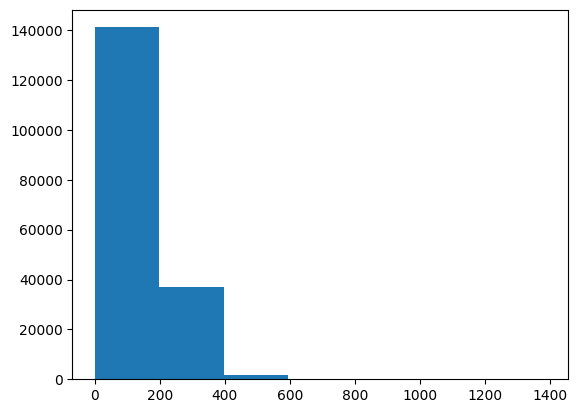

In [ ]:
# Dizilerimizin karakter düzeyinde dağılımını kontrol edin
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Hangi karakter uzunluğunun dizilerin %95'ini kapsadığını bulun
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

Böylece dizilerin %95'ini kapsayan dizi uzunluğunu biliyoruz, bunu TextVectorization katmanımızda output_sequence_length parametresi olarak kullanacağız.

🔑 Not: En uygun output_sequence_length'in ne olması gerektiğini bulmak için burada deney yapabilirsiniz, belki de ortalama sonuçları %95 yüzdelik dilim kullanmak kadar iyi sonuçlar elde edebilirsiniz.

Max_tokens'i (dizilerimizdeki farklı karakterlerin toplam sayısı) 28, başka bir deyişle, alfabenin 26 harfi + boşluk + OOV (kelime dağarcığı dışında veya bilinmeyen) belirteçleri olarak ayarlayacağız.

In [ ]:
# Karakter düzeyinde yerleştirme için tüm klavye karakterlerini alın
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

# ascii --> tüm küçük harfleri kullanmak için

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

- `string.ascii_lowercase`: Küçük harflerden oluşan bir sabit (a'dan z'ye kadar olan harfler).
  
- `string.digits`: Sayılardan oluşan bir sabit (0'dan 9'a kadar olan rakamlar).
  
- `string.punctuation`: Tüm yaygın noktalama işaretlerini içeren bir sabit (örn. `!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~`).

Bu üç sabitin birleşimi, küçük harfler, rakamlar ve noktalama işaretlerinin birleştirilmesinden oluşan **alfabe**yi oluşturur.

In [ ]:
# Karakter düzeyinde belirteç vektörleştirici örneği oluşturun

NUM_CHAR_TOKENS = len(alphabet) + 2 #alfabedeki karakter sayısı + boşluk + OOV belirteci

char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Karakter vektörleştiricisini eğitim karakterlerine uyarlayın
char_vectorizer.adapt(train_chars)

standardizasyon None olsaydı, çıktı;

- 57
- '', [UNK], 'e', 't', 'i'
- 'I', '"', ']', '//', ...olurdu.

Yani none ile noktalama işaretlerini terketmiş olursunuz.

`standardize` parametresi, `TextVectorization` katmanının nasıl bir **ön işleme** yapacağına karar verir. Bu parametre, metni modelin girişine uygun hale getirmeden önce uygulanan işlemleri kontrol eder.

`TextVectorization` katmanı, metin verisini bir sayısal temsile dönüştürmeden önce bazı metin ön işleme adımları uygular. Bu işlem, metnin formatını ve biçimini standart hale getirmeye yardımcı olur. `standardize` parametresi, bu ön işleme işleminin nasıl yapılacağını belirler.

**Kullanılabilecek `standardize` seçenekleri:**

1. **`"lower_and_strip_punctuation"`**:
   - Bu seçenek, metni **küçük harfe** dönüştürür ve **noktalama işaretlerini** temizler. Yani, metni küçük harflerle yazacak ve noktalama işaretlerini kaldıracaktır.
   
   Örneğin:
   ```python
   "Merhaba, dünya!" -> "merhaba dunya"
   ```

2. **`"lower"`**:
   - Sadece metni **küçük harfe** dönüştürür.
   
   Örneğin:
   ```python
   "Merhaba, dünya!" -> "merhaba, dünya!"
   ```

3. **`"strip_punctuation"`**:
   - Yalnızca **noktalama işaretlerini kaldırır**, ama büyük/küçük harf farkını korur.
   
   Örneğin:
   ```python
   "Merhaba, dünya!" -> "Merhaba dünya"
   ```

4. **`None` (Varsayılan)**:
   - Hiçbir standartlaştırma yapılmaz. Yani, metin olduğu gibi kalır.
   
   Örneğin:
   ```python
   "Merhaba, dünya!" -> "Merhaba, dünya!"
   ```

5. **Özel Fonksiyon**:
   - Kendi özel standardizasyon fonksiyonunuzu yazabilirsiniz. Örneğin, belirli kelimeleri değiştirmek veya bazı karakterleri silmek gibi.

`char_vectorizer.adapt(train_chars)`

Son olarak, `char_vectorizer.adapt(train_chars)` satırı, `train_chars` adlı eğitim verisi üzerinde bu vektörleştiriciyi **uyarlamak** için kullanılır. Bu işlem sırasında, `train_chars` verisindeki karakterler gözlemlenir ve model, her karakterin sayısal bir temsilini oluşturmak için uygun parametreleri öğrenir.

In [ ]:
# Karakter sözlüğü özelliklerini kontrol edin
char_vocab = char_vectorizer.get_vocabulary()
print(f"Karakter sözlüğündeki farklı karakterlerin sayısı: {len(char_vocab)}")
print(f"En yaygın 5 karakter: {char_vocab[:5]}")
print(f"En az yaygın olan 5 karakter: {char_vocab[-5:]}")

Karakter sözlüğündeki farklı karakterlerin sayısı: 28
En yaygın 5 karakter: ['', '[UNK]', 'e', 't', 'i']
En az yaygın olan 5 karakter: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Karakter vektörleştiricisini test edin

random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")

vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
b e f o r e   t r e a t m e n t   ,   t h e r e   w a s   n o   s i g n i f i c a n t   d i f f e r e n c e   b e t w e e n   t w o   g r o u p s   i n   e a c h   i n d e x   (   p   >   @   )   .

Length of chars: 80

Vectorized chars:
[[22  2 17  7  8  2  3  8  2  5  3 15  2  6  3  3 13  2  8  2 20  5  9  6
   7  9  4 18  6  4 17  4 11  5  6  3 10  4 17 17  2  8  2  6 11  2 22  2
   3 20  2  2  6  3 20  7 18  8  7 16 14  9  4  6  2  5 11 13  4  6 10  2
  24 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  

Uzunluğu 290'dan (output_seq_char_length) daha kısa olan dizilerin sonunda sıfırlarla doldurulduğunu fark edeceksiniz, bu da modelimize geçirilen tüm dizilerin aynı uzunlukta olmasını sağlar.

Ayrıca, TextVectorization'ın standartlaştırma parametresinin "lower_and_strip_punctuation" ve bölünmüş parametrenin varsayılan olarak "whitespace" olması nedeniyle, semboller (@ gibi) ve boşluklar kaldırılır.

🔑 Not: Noktalama işaretlerinin kaldırılmasını istemediyseniz (@, % vb. tutun), özel bir standardizasyon çağrılabilir oluşturabilir ve bunu standartlaştırma parametresi olarak geçirebilirsiniz. Daha fazla bilgi için TextVectorization katmanı belgelerine bakın.

**Karakter düzeyinde bir gömme oluşturma**

Karakter düzeyindeki dizilerimizi vektörleştirmenin bir yolu var, şimdi bir karakter düzeyinde gömme oluşturma zamanı.

Tıpkı özel belirteç gömmemiz gibi, bunu tensorflow.keras.layers.Embedding sınıfını kullanarak yapabiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

Karakter düzeyinde gömme katmanımız bir giriş boyutu ve çıkış boyutu gerektirir.

Giriş boyutu (input_dim), char_vocab'ımızdaki (28) farklı karakterlerin sayısına eşit olacaktır. Ve Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları Şekil 1'deki modelin yapısını takip ettiğimizden, karakter gömmenin (output_dim) çıktı boyutu 25 olacaktır. https://arxiv.org/pdf/1612.05251

dokümanda, input_dim --> int. Kelime haznesidir. Örneğin max tamsayı indexi +1 gibi.

output_dim --> int. Yoğun gömmenin şekilsel boyutu.

In [ ]:
# Karakter gömmesi katmanı oluştur
char_embed = layers.Embedding(
    input_dim = NUM_CHAR_TOKENS,  # farklı karakter sayısı
    output_dim = 25,              # her karakterin yerleştirme boyutu (Figure 1 ile aynı https://arxiv.org/pdf/1612.05251.pdf)
    mask_zero = True,             # maske kullanmayın (True olarak ayarlanırsa bu model_5'i bozar)
    name = "char_embedding"
)

# Karakter yerleştirme katmanını test edin
print(f"Charified metin (vektörleştirme ve yerleştirmeden önce):\n{random_train_chars}\n")

char_embed_example = char_embed(char_vectorizer([random_train_chars]))

print(f"Gömülü karakterler (vektörleştirme ve yerleştirmeden sonra):\n{char_embed_example}\n")

print(f"Karakter yerleştirme şekli: {char_embed_example.shape}")

Charified metin (vektörleştirme ve yerleştirmeden önce):
b e f o r e   t r e a t m e n t   ,   t h e r e   w a s   n o   s i g n i f i c a n t   d i f f e r e n c e   b e t w e e n   t w o   g r o u p s   i n   e a c h   i n d e x   (   p   >   @   )   .

Gömülü karakterler (vektörleştirme ve yerleştirmeden sonra):
[[[ 0.0394259   0.02469474 -0.04906693 ... -0.03765197 -0.01020537
    0.04477144]
  [-0.028685    0.01803899  0.01715585 ... -0.03201541  0.01884799
    0.04072127]
  [-0.04388865  0.00688157 -0.02571483 ... -0.02481255  0.00622012
    0.0067553 ]
  ...
  [-0.02440536  0.0424017  -0.02214311 ...  0.01463326  0.03493572
   -0.0461356 ]
  [-0.02440536  0.0424017  -0.02214311 ...  0.01463326  0.03493572
   -0.0461356 ]
  [-0.02440536  0.0424017  -0.02214311 ...  0.01463326  0.03493572
   -0.0461356 ]]]

Karakter yerleştirme şekli: (1, 290, 25)


Dizilerimizdeki karakterlerin her biri 25 boyutlu bir gömmeye dönüştürülür. Her bir harf özellik vektörüne dönüştü.

290 uzunluğa kadar sıfırlarla doldurulur. 1 dizi var, 290 karakter var (char vectorizer kaç harf olursa olsun 290'a kadar padding yapar), 25 gömme karakteri.

Şimdi karakter düzeyindeki dizilerimizi sayılara (char_vectorizer) dönüştürmenin ve onları bir gömme (char_embed) olarak sayısal olarak temsil etmenin bir yolu var, karakter düzeyinde bir dizi modeli oluşturarak dizilerimizdeki bilgileri kodlamada ne kadar etkili olduklarını test edelim.

Model, özel belirteç yerleştirme modelimizle (model_1) aynı yapıya sahip olacaktır, ancak belirteç düzeyinde diziler yerine karakter düzeyinde diziler giriş olarak alacaktır.

Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)

In [ ]:
%%time
# Karakterler için (harf) Conv1D hazırlama
inputs = layers.Input(shape = (1,), dtype = "string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_3 = tf.keras.Model(
    inputs = inputs,
    outputs = outputs,
    name = "model_3_conv1D_char_embedding"
)

# Modelin derlenmesi
model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Modelimizi verilere sığdırmadan önce, karakter düzeyinde toplu PrefetchedDataset'ler oluşturmalıyız
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

print(train_char_dataset)

# Modeli uydur
model_3_history = model_3.fit(
    train_char_dataset,
    steps_per_epoch=int(0.1 * len(train_char_dataset)),
    epochs=3,
    validation_data=val_char_dataset,
    validation_steps=int(0.1 * len(val_char_dataset))
    )

# Model özeti
model_3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>
Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4197 - loss: 1.3969 - val_accuracy: 0.5814 - val_loss: 1.0622
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5800 - loss: 1.0410 - val_accuracy: 0.6316 - val_loss: 0.9509
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6223 - loss: 0.9517 - val_accuracy: 0.6446 - val_loss: 0.8973


Model: "model_3_conv1D_char_embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_vectorizer (TextVectorization)  │ (None, 290)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_embedding (Embedding)           │ (None, 290, 25)             │           1,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,419 (118.83 KB)

 Trainable params: 10,139 (39.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,280 (79.22 KB)

CPU times: user 13.5 s, sys: 1.33 s, total: 14.8 s
Wall time: 12.5 s


In [ ]:
# Model_3'ü tüm doğrulama karakteri veri kümesinde değerlendirin
model_3.evaluate(val_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6505 - loss: 0.8906


[0.8938198089599609, 0.6496756076812744]

In [ ]:
# Yalnızca karakter modeliyle tahminlerde bulunun
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.168758  , 0.16304976, 0.23900391, 0.32760364, 0.10158475],
       [0.11768349, 0.60637593, 0.011198  , 0.1211826 , 0.14355993],
       [0.0998732 , 0.31029567, 0.33654052, 0.21033841, 0.04295219],
       ...,
       [0.02575635, 0.03783292, 0.37089068, 0.09197588, 0.47354418],
       [0.04610219, 0.12186202, 0.4773507 , 0.07366963, 0.28101537],
       [0.4160033 , 0.40838563, 0.0707214 , 0.08389489, 0.02099485]],
      dtype=float32)

In [ ]:
# Tahminleri sınıflara dönüştürün
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 2, ..., 4, 2, 0])>

In [ ]:
# Yalnızca Conv1D karakter modeli sonuçlarını hesapla
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

ValueError: Input arrays use different devices: cpu, /job:localhost/replica:0/task:0/device:GPU:0

### **3.10. Önceden Eğitilmiş Token Gömmeler ve Karakter Gömmeleri Birleştirerek Modelleme ve Değerlendirme**

Medical Paper Abstracts'da Ortak Cümle Sınıflandırması için Sinir Ağları Şekil 1'dekine benzer bir model oluşturmaya yaklaşırken, bahsettikleri hibrit belirteç gömme katmanını ele almanın zamanı geldi. https://arxiv.org/pdf/1612.05251

Bu karma belirteç gömme katmanı, belirteç gömme ve karakter gömmelerinin bir kombinasyonudur. Başka bir deyişle, dizileri sıra etiketi tahmin katmanına geçirmeden önce temsil etmek için yığılmış bir gömme oluştururlar.

Şimdiye kadar belirteç ve karakter düzeyinde gömmeler kullanan iki model geliştirdik, ancak bu iki model bu gömmelerin her birini özel olarak kullandı.

Şekil 1'deki modeli çoğaltmaya (veya çoğaltmaya yaklaşmaya) başlamak için aşağıdaki adımlardan geçeceğiz:

1. Token düzeyinde bir model oluşturun (model_1'e benzer)

2. Karakter düzeyinde bir model oluşturun (kağıdı yansıtmak için hafif bir değişiklikle model_3'e benzer)

3. 1 ve 2'nin çıktılarını birleştirin (layers.Concatenate) https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate

4. Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları'nın Şekil 1 ve bölüm 4.2'ye benzer 3'ün üzerine bir dizi çıktı katmanı oluşturun

5. Token ve karakter düzeyinde dizileri girdi olarak alan ve çıktı olarak sıra etiketi olasılıkları üreten bir model oluşturun

In [ ]:
# 1. Belirteç girişlerini/modelini ayarlayın
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Karakter girişlerini/modelini ayarlayın
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # https://arxiv.org/pdf/1612.05251.pdf adresindeki Şekil 1'de gösterilen bi-LSTM
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Belirteç ve karakter girişlerini birleştirin (hibrit belirteç yerleştirme oluşturun)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Çıktı katmanları oluşturun - https://arxiv.org/pdf/1612.05251.pdf 4.2'de açıklanan bırakmanın eklenmesi
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # belirteç/karakter yerleştirme katmanlarının farklı şekilleri nedeniyle Şekil 1'den biraz farklı
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Karakter ve jeton girişleriyle model oluşturun
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

# Belirteç karakter modelini derle
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # https://arxiv.org/pdf/1612.05251.pdf bölümünün 4.2 bölümünde SGD kullanımından bahsediliyor ancak biz Adam'a sadık kalacağız
                metrics=["accuracy"])

# Model özeti
model_4.summary()

NameError: name 'tf_hub_embedding_layer' is not defined

Bu kod, bir **hibrit model** oluşturarak **belirteç (token) temelli yerleştirme** ve **karakter temelli yerleştirme** yöntemlerini birleştiriyor. Kodun belirli bölümlerini daha ayrıntılı açıklayayım:

```python
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
```

Bu satırda, **Bidirectional LSTM (Bi-LSTM)** katmanı kullanılmıştır.

**Bi-LSTM Nedir?**

- **LSTM (Long Short-Term Memory)**, sekans (zaman serisi veya kelimeler gibi sıralı veriler) üzerindeki uzun menzilli bağımlılıkları öğrenebilen bir tür **Recurrent Neural Network (RNN)** katmanıdır. LSTM, özellikle dil işleme görevlerinde yaygın olarak kullanılır çünkü geçmiş bilgileri uzun süre hatırlayabilir ve geçici verileri unutarak önemli olanları öğrenebilir.

- **Bidirectional LSTM (Bi-LSTM)**, LSTM katmanının iki yönlü versiyonudur. Bu, sıralı veriyi hem **soldan sağa** hem de **sağdan sola** işleyerek daha fazla bağlam bilgisi elde eder. Bu sayede, metnin başından ve sonundan gelen bağlamları aynı anda öğrenebiliriz.

- **`LSTM(25)`**: Bu, LSTM katmanının çıktısının boyutunu belirtir. Yani, her bir zaman adımında 25 boyutlu bir vektör elde edilecek.

---

```python
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_output)
```

```python
char_model = tf.keras.Model(inputs=char_inputs, outputs=char_bi_lstm)
```

Bu satırlarda **model parçaları** tanımlanıyor:

- **`token_model`**: Bu, **belirteç temelli yerleştirme** modelidir. `token_inputs` (kelimeler ya da belirteçler) ile başlar ve `token_embeddings`'ten geçtikten sonra, bir **`Dense`** katmanına (`token_output`) bağlanır. Bu model sadece belirteç düzeyinde öğrenme yapar.

- **`char_model`**: Bu, **karakter temelli yerleştirme** modelidir. `char_inputs` (karakterler) ile başlar, `char_vectorizer` ile metni vektörleştirir, ardından `char_embed` ile karakter gömmeleri elde edilir ve sonrasında bir **Bi-LSTM katmanı** (`char_bi_lstm`) ile bu karakter dizileri üzerinde öğrenme yapılır.

---

```python
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])
```

Buradaki `token_model.output` ve `char_model.output` kullanımı, her iki modelin **çıkışlarını** almak için kullanılır:

- **`token_model.output`**: `token_model`'in çıkışı, belirteçler için öğrenilen özellikleri içerir (yani, `token_output` katmanından gelen sonuç).
  
- **`char_model.output`**: `char_model`'in çıkışı, karakterler için öğrenilen özellikleri içerir (yani, `char_bi_lstm` katmanından gelen sonuç).

`layers.Concatenate` katmanı, bu iki çıktıyı **birleştirir** (concatenate). Burada `name="token_char_hybrid"` ismi verilmiş. Bu, her iki modelin çıktılarının **hibrit bir şekilde** birleştiği bir özellik vektörü oluşturur.

**.output** ifadesi, her modelin son katmanındaki çıkışı belirtir. Modelin katmanlarını tanımlarken, `Model()` sınıfının çıktısı genellikle `.output` olarak erişilir.

---

```python
combined_dropout = layers.Dropout(0.5)(token_char_concat)
```

```python
final_dropout = layers.Dropout(0.5)(combined_dense)
```

**Dropout**, **aşırı uyum** (overfitting) problemini önlemeye yardımcı olan bir **düzenleme** (regularization) yöntemidir. Dropout, eğitim sırasında belirli katmanlardan rastgele **nöronları devre dışı bırakır**. Bu sayede, modelin her bir nöronun bağımlı hale gelmesi engellenir ve genelleme yeteneği artırılır.

- **`0.5`**: Dropout oranını belirtir. Burada `0.5` değeri, her bir eğitim adımında %50 oranında nöronun rastgele devre dışı bırakılacağı anlamına gelir.

- Dropout katmanları, aşırı uyumun önlenmesine yardımcı olur, çünkü her eğitim adımında farklı nöronlar devre dışı bırakıldığı için model, daha sağlam bir şekilde genel kalıpları öğrenir.

Eğitim sırasında, **dropout** uygulandıktan sonra model sadece en önemli özellikleri öğrenmeye çalışır ve çok fazla modelin öğrenmesini engelleyen bağımlılıklar oluşmaz.

4.2 ile ilgili olarak; model, stokastik gradyan iniş kullanılarak eğitilir ve her gradyan adımında tüm parametreler, yani jeton yerleştirmeleri, karakter yerleştirmeleri, çift yönlü LSTM parametreleri ve geçiş olasılıkları güncellenir. Düzenleme için, karakter geliştirilmiş token yerleştirmelerine ve etiket tahmin katmanından önce 0,5 oranında bırakma uygulanır.

5 --> bu sıralı API ile değil fonksiyonel API ile oluşturduk. Bu yüzden token modeli girişine ihtiyacımız var ve bunu da kullanabilmek için char model girişi kullanılmalı.

Aslında yapılan iki model oluşturuldu, çıktılar birleştirildi, bir token ve bir karakter çıktısı birleşti ve sonra bunlar üzerine bazı katmanlar ekledik.

In [ ]:
# Hibrit jeton ve karakter modelini çizin
from tensorflow.keras.utils import plot_model
plot_model(model_4)

🔑 Not: Medical Paper Abstracts'ta Ortak Cümle Sınıflandırması için Sinir Ağları Bölüm 4.2, SGD (stokastik gradyan iniş) optimize ediciyi kullanarak bahseder, ancak diğer modellerimizle tutarlı kalmak için Adam optimizer'ı kullanacağız. Bir alıştırma olarak, tf.keras.optimizers.Adam yerine tf.keras.optimizers.SGD kullanmayı deneyebilir ve sonuçları karşılaştırabilirsiniz.

- https://arxiv.org/pdf/1612.05251
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

Ve yine, deneylerimizi hızlı tutmak için, token-character-hybrid modelimizi eğitimin %10'una sığdıracağız ve doğrulama gruplarının %10'unu doğrulayacağız. Bununla birlikte, bu model ile fark, iki girdi, belirteç düzeyinde diziler ve karakter düzeyinde diziler gerektirmesidir.

Bunu, ilk girdi olduğu gibi bir demet ile bir tf.data.Dataset oluşturarak yapabiliriz, örneğin:

((Token_data, char_data), (etiket))

**Token ve karakter verilerini bir tf.data veri kümesinde birleştirme**

- zip kodu ile iki farklı veri kümesi birleştirilir.
- Hızlı deney yapma hedefiyle val...kodları yazıldı.
- Token model girdisine ve char model girdisine nasıl sahip olduğumuza dikkat. Token seviyesinde veriler vardı, cümleleri eğittik ve traine aldık. Yani bu modelin inşa edildiği sırayla aynı. Aksi takdirde, farklı bir sırayla iletirsek, modelimiz belirteç seviyesi modelini kullanmaya çalışabilir.

In [ ]:
# Karakterleri ve belirteçleri bir veri kümesinde birleştirin
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # veri yap
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # etiket yap
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # veri ve etiketleri birleştir

# Verileri önceden getirme ve toplu eğitim verileri
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Aynı adımları doğrulama verilerini tekrarlayın
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Eğitim karakteri ve belirteç yerleştirme veri kümesine göz atın
train_char_token_dataset, val_char_token_dataset

# Token ve karakter düzeyindeki dizilere bir model uydurmak
model_4_history = model_4.fit(train_char_token_dataset, # belirteç ve karakterlerden oluşan veri kümesi üzerinde eğitim alın
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

NameError: name 'model_4' is not defined

1. **Veri Kümesi Oluşturma (Dataset Creation)**

```python
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))
```
  - `train_sentences` (cümleler) ve `train_chars` (karakterler) eğitim verisini içerir. Burada, her bir cümle ve ona karşılık gelen karakter dizisi eşleştirilir.
  - `train_labels_one_hot` ise her örneğe karşılık gelen etiketlerin one-hot kodlamasıdır. (Yani, sınıf etiketlerinin 0-1 vektörleri olarak temsil edilmesi)
  - `tf.data.Dataset.from_tensor_slices()` fonksiyonu, bu verileri bir TensorFlow veri kümesine dönüştürür. Bu veri kümesi modelin eğitiminde kullanılacak.
  - `tf.data.Dataset.zip()` ile hem veriler (`train_char_token_data`) hem de etiketler (`train_char_token_labels`) eşleştirilir. Bu, modelin eğitim verisi ve etiketleriyle birlikte kullanılabilmesini sağlar.

2. **Veri Kümesi Üzerinde İşlem Yapma (Prefetching and Batching)**

```python
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
```

- **Açıklama**: Bu satırda iki şey yapılır:
  - `batch(32)`: Eğitim verisi, 32 örnekten oluşan "batch" (toplu) olarak gruplandırılır. Bu, modelin daha verimli bir şekilde eğitilmesini sağlar. Batch'ler sayesinde model her seferinde sadece bir kısmı üzerinde işlem yapar, bu da daha hızlı işlemeye olanak tanır.
  - `prefetch(tf.data.AUTOTUNE)`: Verilerin "prefetch" edilmesi, yani modelin eğitimi sırasında verilerin önceden yüklenmesi anlamına gelir. Bu, I/O işlemlerinin eğitim sırasında engel oluşturmadan hızlı bir şekilde yapılmasını sağlar. `AUTOTUNE` TensorFlow'un otomatik olarak en iyi önceden getirme (prefetch) stratejisini seçmesini sağlar.

3. **Doğrulama Verisi için Aynı İşlemleri Tekrarlama**

```python
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
```

- **Açıklama**: Bu satırlar, doğrulama verisi için yukarıdaki işlemlerin tekrarlanmasıdır. Eğitim verisinde yapılan tüm işlemler doğrulama verisi için de aynı şekilde yapılır. Buradaki temel amaç, eğitim ve doğrulama veri kümelerinin her ikisinin de aynı formatta ve verimli bir şekilde yüklenmesini sağlamaktır.

4. **Veri Kümesini İnceleme**

```python
train_char_token_dataset, val_char_token_dataset
```

- **Açıklama**: Bu satır, eğitim ve doğrulama veri kümelerini kontrol etmek için yazılmış. Çalıştırıldığında, bu iki veri kümesinin TensorFlow veri kümesi olarak nasıl göründüğünü gösterir. Bu işlem genellikle kodun doğru çalıştığından emin olmak amacıyla kullanılır.

5. **Modeli Eğitim İçin Uygulama (Model Fitting)**

```python
model_4_history = model_4.fit(
    train_char_token_dataset,
    steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
    epochs=3,
    validation_data=val_char_token_dataset,
    validation_steps=int(0.1 * len(val_char_token_dataset))
)
```

- **Açıklama**: Bu satır modelin eğitimini başlatır.
  - `model_4.fit()` fonksiyonu, verilen eğitim veri kümesi (`train_char_token_dataset`) üzerinde modeli eğitir.
  - `steps_per_epoch=int(0.1 * len(train_char_token_dataset))`: Bu parametre, her epoch başına eğitimde kaç adım (batch) yapılacağını belirtir. Burada eğitim setinin %10'u kadar adım atılacak.
  - `epochs=3`: Modelin 3 epoch boyunca eğitilmesi sağlanır. Bir epoch, tüm eğitim verisinin bir kez model tarafından görülmesidir.
  - `validation_data=val_char_token_dataset`: Modelin her epoch sonunda doğrulama verisi üzerinde nasıl performans gösterdiğini görmek için doğrulama verisi sağlanır.
  - `validation_steps=int(0.1 * len(val_char_token_dataset))`: Her epoch sonunda doğrulama verisi için kaç adım (batch) yapılacağını belirtir. Burada doğrulama setinin %10'u kadar adım yapılır.

Bu kodlar, modeli eğitim verisi ve doğrulama verisi üzerinde eğitir ve modelin doğruluğunu izler. Eğitim sırasında yapılan her adımda, modelin belirteç ve karakter bazlı girdilerle nasıl öğrenmeye çalıştığını gözlemleyebilirsiniz.

In [ ]:
# Doğrulama veri kümesinin tamamını değerlendirin
model_4.evaluate(val_char_token_dataset)

In [ ]:
# Belirteç-karakter modeli hibritini kullanarak tahminlerde bulunun
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

In [ ]:
# Token-char-hibrit modelinin sonuçlarını alın
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

### **3.11. Önceden Eğitilmiş Token Gömmeler, Karakter Gömmeleri ve Konumsal Gömmeleri Birleştirerek Modelleme ve Değerlendirme**

Token gömmelerini ve karakter gömmelerini birleştirmek modelimize biraz performans artışı sağladı gibi görünüyor.

Ama ekleyebileceğimiz bulmacanın bir parçası daha var.

Ya kendi özelliklerimizi modele dönüştürseydik?

Yani, modelimize örneklerimiz hakkında daha fazla bilgi vermek için veriler hakkında kendi bilgimizi alıp sayısal bir şekilde kodlasaydık ne olur?

Bir modele girdi olarak özellikler oluşturmak için kendi bilginizi uygulama sürecine özellik mühendisliği denir.

Sınıflandırmaya çalıştığımız diziler hakkında önemli bir şey düşünebiliyor musunuz?

Bir özete bakacak olsaydınız, cümlelerin sırayla görünmesini bekler miydiniz? Yoksa sırayla görünmeleri mantıklı mı? Örneğin, begging'de SONUÇLAR olarak etiketlenmiş diziler ve sonunda HEDEF olarak etiketlenmiş diziler?

Özetler tipik olarak sıralı bir sırada gelir, örneğin:

- OBJECTIVE ...
- METHODS ...
- METHODS ...
- METHODS ...
- RESULTS ...
- CONCLUSIONS ...

ya da;

- BACKGROUND ...
- OBJECTIVE ...
- METHODS ...
- METHODS ...
- RESULTS ...
- RESULTS ...
- CONCLUSIONS ...
- CONCLUSIONS ...

Tabii ki, dizi etiketlerinin kendilerini eğitim verilerine dönüştüremeyiz (test zamanında bunlara sahip değiliz), ancak bir dizi dizinin sırasını soyut olarak kodlayabiliriz.

Örneğin,

- Sentence 1 of 10 ...
- Sentence 2 of 10 ...
- Sentence 3 of 10 ...
- Sentence 4 of 10 ...

Bunu preprocess_text_with_line_numbers() işlevimizi oluşturduğumuzda fark etmiş olabilirsiniz. Bir özet metin dosyasında okuduğumuzda, bir özetteki satır sayısını ve her satırın kendisinin sayısını saydık.

Bunu yapmak, DataFrames'lerimizin "line_number" ve "total_lines" sütunlarına yol açtı.

Feature Engineering
- Verilerden kesin olmayan özellikleri alıp rakamlara dönüştürme (amaç modelin öğrenmesi).
- Modele nasıl fazladan veri kaynağı ekleyebiliriz?


In [ ]:
# Eğitim veri çerçevesini inceleyin
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


"Line_number" ve "total_lines" sütunları, mutlaka eğitim verileriyle birlikte gelmeyen, ancak konumsal bir gömme olarak modelimize aktarılabilen özelliklerdir. Başka bir deyişle, konumsal gömme, cümlenin bir soyutta göründüğü yerdir.

Bu özellikleri kullanabiliriz çünkü test zamanında mevcut olacaklar.

Özetler tipik olarak onlar hakkında sıralı bir sıraya sahip olduğundan (örneğin, arka plan, amaç, yöntemler, sonuçlar, sonuç), belirli bir cümlenin gerçekleştiği yerin satır numarasını modelimize eklemek mantıklıdır. İşin güzel yanı, bu özellikler test zamanında mevcut olacak (sadece bir özetteki cümle sayısını ve her birinin sayısını sayabiliriz).

Yani, modelimizin hiç görmediği bir soyuttaki dizilerin etiketlerini tahmin edecek olsaydık, çizgi sayısını ve her bir çizginin konumunu izleyebilir ve modelimize aktarabilirdik.

🛠 Alıştırma: Konumsal gömme özelliğimizi oluşturmanın başka bir yolu, "line_number" ve "toplam_lines" sütunlarını bir arada birleştirmek olacaktır, örneğin bir "line_position" sütunu 1_of_11, 2_of_11, vb. gibi değerler içerebilir. 1_of_11, 11 cümle uzunluğunda bir özetteki ilk satır olacaktır. Aşağıdaki adımlardan geçtikten sonra, bu konumsal gömme aşamasını tekrar gözden geçirmek ve birleşik bir "line_position" sütununun iki ayrı sütuna karşı nasıl gittiğini görmek isteyebilirsiniz.

**Konumsal Gömmeler**

"Line_number" ve "total_line" sütunlarımız zaten sayısal olduğundan, onları modelimize olduğu gibi geçirebiliriz.

Ancak modelimizin "line_number"=5 içeren bir satırın "line_number"=1 olan bir satırdan beş kat daha büyük olduğunu düşünmekten kaçınmak için, "line_number" ve "total_lines" özelliklerimizi kodlamak için one-hot-encoding kullanacağız.

Bunu yapmak için tf.one_hot yardımcı programını kullanabiliriz.

Tf.one_hot, tek sıcak kodlanmış bir tensör döndürür. Bir diziyi (veya tensörü) girdi olarak kabul eder ve derinlik parametresi döndürülen tensörün boyutunu belirler.

Derinlik parametresini neye ayarlamamız gerektiğini bulmak için, "line_number" sütununun dağılımını araştıralım.

🔑 Not: Özelliklerimizi tek sıcak kodlama söz konusu olduğunda, Scikit-Learn'in OneHotEncoder sınıfı burada başka bir uygulanabilir seçenektir. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Özellik mühendisliği uygulanırken satır numaraları (cümle nolar, her cümle 1 satır diye geçiyor burada) kullanılmalı mı?

 Bir model yalnızca eğitildiği formatta veriler üzerinde gerçekleştirebilir veya tahminlerde bulunabilir.

Aksi durumda chorme gibi farklı tarayıcılarda sorun çıkabilir?

 Özellik mühendisliği test zamanında erişilebilir olmalı.
 - line numbers
 - toyal lines

In [ ]:
# Kaç farklı satır numarası var?
train_df["line_number"].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

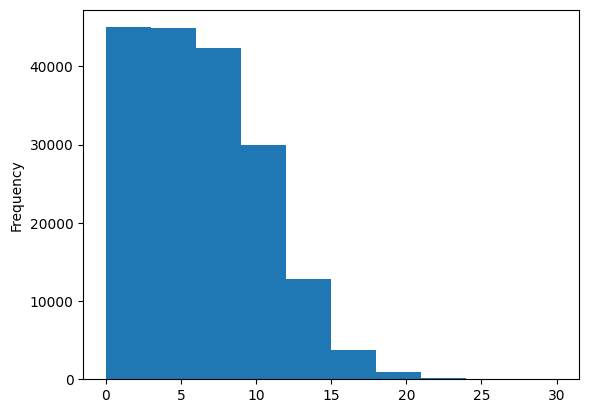

In [ ]:
# "line_number" sütununun dağılımını kontrol edin
train_df.line_number.plot.hist()

In [ ]:
# "line_number" sütunumuzun sıcak kodlanmış tensörlerini oluşturmak için TensorFlow'u kullanın
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

Bu satırlar, **sıra numaraları (line numbers)** gibi kategorik bir özelliğin **one-hot encoding** (tek sıcak kodlama) yöntemini kullanarak sayısal verilere dönüştürülmesini sağlar.

1. **`train_df["line_number"].to_numpy()`**:  
   Bu kısım, eğitim veri setindeki `"line_number"` adlı sütunu seçer ve bu sütundaki değerleri **NumPy dizisi** (`np.array`) haline getirir.
   - Burada `train_df` veri çerçevesindeki her bir satırın sıra numarasını almak istiyoruz.
   - Örneğin, bu sütun her cümlenin bulunduğu satır numarasını veya belge sırasını içerebilir.

2. **`tf.one_hot(..., depth=15)`**:  
   TensorFlow'un `tf.one_hot()` fonksiyonu, kategorik veriyi **one-hot encoding** formatına dönüştürür. Yani her sıra numarasını 15 elemanlı bir vektöre dönüştürür ve sadece ilgili index'e 1 yerleştirir, geri kalan tüm elemanlar 0 olur. Bu `depth=15` parametresiyle belirtilen 15, sınıf sayısını belirtir (yani sıralama numaralarının 0'dan 14'e kadar olduğunu varsayıyoruz).
   
   Örneğin:
   - Eğer bir satırın numarası `2` ise, one-hot encoding sonucu şöyle bir vektör olacaktır: `[0, 0, 1, 0, 0, ..., 0]` (sadece 3. pozisyon 1 olacak, diğerleri 0 olacak).
   - Eğer satır numarası `4` ise, one-hot encoding sonucu şu şekilde olacaktır: `[0, 0, 0, 0, 1, 0, ..., 0]`.

3. **`depth=15`**:  
   Bu parametre, one-hot encoding için kullanılan vektörün uzunluğunu belirtir. Yani burada 15 sınıf olduğu belirtilmiş, bu da her satırın 0'dan 14'e kadar olan bir numaraya sahip olduğu anlamına gelir.

### Örnek:
Eğer `train_df["line_number"]` şu şekilde bir dizi içeriyorsa:
```python
[2, 4, 0, 1, 3]
```

`tf.one_hot()` fonksiyonu, bu diziyi şu şekilde dönüştürür:

```python
[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 2'yi one-hot encode etti
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 4'ü one-hot encode etti
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 0'ı one-hot encode etti
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 1'i one-hot encode etti
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  # 3'ü one-hot encode etti
```

Kullanım Amacı:
- **Model Eğitimi**: Bu tür one-hot encoding, modelin sıralama bilgisiyle (satır numaralarıyla) anlamlı ilişkiler öğrenmesine olanak tanır. Kategorik verileri sayısal verilere dönüştürmek, modelin bu veriyi anlayabilmesi için gereklidir.
- **Kategorik Veriyi Sayısal Hale Getirme**: Özellikle sinir ağlarında kategorik verilerin (satır numaraları, sınıflar, vb.) işlemeye uygun hale gelmesi için one-hot encoding yaygın olarak kullanılır.

Tf.one_hot'un derinlik parametresini 15'e ayarlamak, "line_number" değeri 15'in üzerinde olan herhangi bir numunenin tüm 0'ların tensörüne ayarlandığı anlamına gelir; burada 15'in altındaki "satır_number" olan herhangi bir örnek, tüm 0'ların tensörüne dönüşür, ancak dizinde "line_number" değerine eşit bir 1 ile.

🔑 Not: "line_number" (derinlik=30) tüm potansiyel değerleri için yer olan tek sıcak bir tensör oluşturabiliriz, ancak bu, değerlerin büyük çoğunluğunun 0 olduğu mevcut olanın (derinlik=15) iki katı büyüklüğünde bir tensörle sonuçlanır. Ayrıca, yalnızca ~2.000/180.000 örnek 15'in üzerinde bir "satır_numarası" değerine sahiptir. Bu nedenle, özellik alanımızı ikiye katlamak için verilerimiz hakkında fazla bilgi edinmezdik. Bu tür bir soruna boyutsallığın laneti denir. Ancak, bu derin modellerle çalıştığımız için, modele mümkün olduğunca fazla bilgi atmaya ve ne olduğunu görmeye değer olabilir. Derinlik parametresinin değerlerini bir uzantı olarak keşfetmeyi bırakacağım.

In [ ]:
# Tek-etkin kodlanmış "satır_numarası" özellik örneklerini kontrol edin
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

"Toplam_satır" sütunuyla "satır_numarası" sütunumuz için yaptığımızın aynısını yapabiliriz. İlk olarak, tf.one_hot'un derinlik parametresi için uygun bir değer bulalım.

In [ ]:
# Kaç farklı sayıda satır var?
train_df["total_lines"].value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


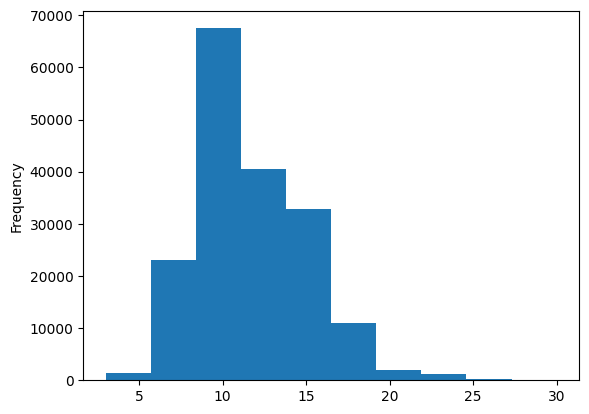

In [ ]:
# Toplam satırların dağılımını kontrol edin
train_df.total_lines.plot.hist();

"Total_lines" sütunumuzun dağılımına bakıldığında, 20 değeri örneklerin çoğunu kapsıyor gibi görünüyor.

Bunu np.percentile() ile doğrulayabiliriz. https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

In [ ]:
# 20 değerindeki "total_lines" değerinin kapsamını kontrol edin
np.percentile(train_df.total_lines, 98) # 20 değeri örneklerin %98'ini kapsar

20.0

In [ ]:
# "total_lines" sütunumuzun sıcak kodlanmış tensörlerini oluşturmak için TensorFlow'u kullanın
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Tek-sıcak tensörün toplam çizgilerinin şeklini ve örneklerini kontrol edin
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

**Tribrid gömme modeli oluşturma**

Konumsal gömme tensörleri hazır.

Şimdiye kadar inşa ettiğimiz en büyük modeli inşa etme zamanı. Token gömmeleri, karakter gömmeleri ve yeni hazırlanmış konumsal gömmelerimizi içeren bir tane.

Keşfedilmiş bölgeye gireceğiz ama burada daha önce uygulamadığınız hiçbir şey olmayacak.

Daha spesifik olarak aşağıdaki adımlardan geçeceğiz:

1. Token düzeyinde bir model oluşturun (model_1'e benzer)

2. Karakter düzeyinde bir model oluşturun (kağıdı yansıtmak için hafif bir değişiklikle model_3'e benzer)

3. Bir "line_number" modeli oluşturun (tek-sıcak kodlanmış "line_number" tensörünü alır ve doğrusal olmayan bir katmandan geçirir)

4. Bir "total_lines" modeli oluşturun (tek-sıcak kodlu "total_lines" tensörü alır ve doğrusal olmayan bir katmandan geçirir)

5. 1 ve 2'nin çıktılarını bir token-karakter-hibrit gömme içinde birleştirin (katmanlar kullanarak. Birleştirin) ve Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları'nın Şekil 1 ve bölüm 4.2'sine çıktı serisini iletin https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate

6. 3, 4 ve 5'in çıktılarını bir token-karakter-konumsal tribrid gömmede birleştirin (katmanlar kullanarak. Birleştirin)

7. Tribrid gömme ve çıkış tahmin edilen etiket olasılıklarını kabul etmek için bir çıktı katmanı oluşturun

8. 1, 2, 3, 4 girişlerini ve 7'nin çıkışlarını bir tf.keras.Model'de birleştirin https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://arxiv.org/pdf/1612.05251

LSTM(32) dokümandan gelir, videoda 24 yapmış gerekçesi de karakter gömme token 50 ike 25 alıyor, ama 8'in katlarını tercih etmek için bunu uyguluyor.

train_line_numbers_one_hot[0].shape --> 15

train_total_lines_one_hot.shape --> (180040,20)

4'te model ismi y diye adlandırıldı, x ile karıştırmamamk için. Ayrıca 32'lik özellik vektörüne gömülme olur.

In [ ]:
# 1. Token girişleri
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Karakter girişleri
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Satır numarası girişleri
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Toplam satır girişleri
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Token ve karakter yerleştirmelerini hibrit bir yerleştirmede birleştirin
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Konumsal yerleştirmeleri birleştirilmiş belirteç ve karakter yerleştirmeleriyle bir tribrid yerleştirmede birleştirin
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Çıktı katmanı oluştur
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Modeli bir araya getir
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

# Model özeti
model_5.summary()

TypeError: Exception encountered when calling layer 'keras_layer_6' (type KerasLayer).

Binding inputs to tf.function failed due to `A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
`. Received args: (<KerasTensor shape=(None,), dtype=string, sparse=False, name=token_inputs>,) and kwargs: {} for signature: (inputs: TensorSpec(shape=<unknown>, dtype=tf.string, name=None)).

Call arguments received by layer 'keras_layer_6' (type KerasLayer):
  • inputs=<KerasTensor shape=(None,), dtype=string, sparse=False, name=token_inputs>
  • training=None

* char_inputs --> karakter gömme
* token_inputs --> token dömme
* line_number_input ve total_line_input --> özellik gömme

In [ ]:
# Belirteci, karakteri ve konumsal gömme modelini çizin
from tensorflow.keras.utils import plot_model
plot_model(model_5)

Modeli görselleştirmek, anlaşılmayı çok daha kolay hale getirir.

Esasen yaptığımız şey, dizilerimiz hakkında mümkün olduğunca fazla bilgiyi çeşitli gömmelere (modelimize girdiler) kodlamaya çalışmaktır, böylece modelimiz hangi etiketin bir diziye (modelimizin çıktıları) ait olduğunu bulmak için en iyi şansa sahiptir.

Modelimizin, Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları Şekil 1'de gösterilen modele çok benzediğini fark edeceksiniz. Ancak, hala birkaç fark devam ediyor: https://arxiv.org/pdf/1612.05251

- GloVe emebdding'ler yerine önceden eğitilmiş TensorFlow Hub belirteç gömmeleri kullanıyoruz.

- Bi-LSTM katmanı yerine token-karakter hibrit gömmelerimizin üzerinde yoğun bir katman kullanıyoruz.

- Makalenin Bölüm 3.1.3'ü, bir etiket dizisi optimizasyon katmanından bahseder (bu, dizi etiketlerinin saygın bir sırayla çıkmasını sağlamaya yardımcı olur) ancak Şekil 1'de gösterilmez. Modelimizde bu katmanın eksikliği için makyaj yapmak için konumsal gömme katmanlarını oluşturduk.

- Makalenin 4.2. Bölümü, belirteç ve karakter gömmelerinin eğitim sırasında güncellendiğinden bahseder, önceden eğitilmiş TensorFlow Hub gömmelerimiz donmuş kalır.

- Kağıt SGD optimize ediciyi kullanıyor, Adam'a bağlı kalacağız.

- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

Yukarıdaki tüm farklılıklar bu projenin potansiyel uzantılarıdır.

In [ ]:
# Modelimizin hangi katmanlarının eğitilebilir olup olmadığını kontrol edin
for layer in model_5.layers:
  print(layer, layer.trainable)

Şimdi modelimiz inşa edildi, derleyelim.

Bu sefer, kayıp fonksiyonumuza label_smoothing adlı yeni bir parametre tanıtacağız. Etiket yumuşatma, bir örneğe belirli bir etiket uygulamaya çok fazla odaklanmadığından emin olarak modelimizi düzenlemeye (aşırı takmayı önlemeye) yardımcı olur.

Örneğin, bir çıktı tahminine sahip olmak yerine:

- Bir numune için [0.0, 0.0, 1.0, 0.0, 0.0] (model, doğru etiketin indeks 2 olduğundan çok emindir).

Tahminler şöyle bir şey olacak şekilde yumuşatılacak:

- [0.01, 0.01, 0.096, 0.01, 0.01] diğer etiketlerin her birine küçük bir aktivasyon vererek, umarım genellemeyi iyileştirir.

📖 Kaynak: Etiket yumuşatma hakkında daha fazla bilgi için, PyImageSearch'ün harika blog gönderisine bakın, Keras, TensorFlow ve Deep Learning ile etiket yumuşatma. https://pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/

label smooting --> 0-1 arası float türünde sayıdır. Etiket değerleri yumuşatılmıştır. Etiket değerine olan güvenirlilik esnektir. Örneğin bu değer 0.2 ise bir 0 etiketi için 0.1 ve 1 etiketi için 0.9 kullanılır.

Sıfırda, bir sıfır noktasında takılırsa, öğrenmeyi tamamen durdurabilir çünkü model der ki ben sadece 1.0 olanı öğreneceğim, diğerleri unutulabilir.

Ama yumuşatılmışta model 0.01'de sıkışıp kalmaz, daha sağlıklı tahminler...

Etiket yumuşatması olan bu işlevi kullanabilmek için etiketlerimize tek bir sıcak kodlama biçiminde ihtiyacımız vardı.

In [ ]:
# Belirteç, karakter ve konumsal gömme modelini derleyin
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # etiket yumuşatma ekleyin (gerçekten kendine güvenen örnekler biraz yumuşatılır)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

**Tribrid gömme veri kümeleri oluşturun ve tribrid modelini sığdırın**

Bu sefer modelimiz dört özellik girişi gerektiriyor:

1. Eğitim hattı numaraları tek sıcak tensör (train_line_numbers_one_hot)

2. Eğitim toplam hatları bir-sıcak tensör (train_total_lines_one_hot)

3. Token-seviye dizileri tensörü (train_sentences)

4. Char-level dizileri tensörü (train_chars)

Uygun şekilde şekillendirilmiş ve toplu PrefetchedDataset'ler oluşturmak için bunları tf.data.Dataset.from_tensor_slices() yöntemimize demet olarak aktarabiliriz.

In [ ]:
# Eğitim ve doğrulama veri kümeleri oluşturun (dört tür girdinin tümü)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # satır numarası
                                                                train_total_lines_one_hot, # toplam satırlar
                                                                train_sentences, # eğitim tokenleri
                                                                train_chars)) # eğitim karakterleri
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # eğitim etiketleri
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # veri ve etiketleri birleştir
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # gruplara dönüştürün ve uygun şekilde önceden getirin

# Doğrulama veri kümesi
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # gruplara dönüştürün ve uygun şekilde önceden getirin

# Giriş şekillerini kontrol edin
train_pos_char_token_dataset, val_pos_char_token_dataset

# Belirteci, karakteri ve konumsal gömme modelini takın
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

NameError: name 'model_5' is not defined

In [ ]:
# Belirteç-karakter-konumsal hibrit modelle tahminler yapın
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

In [ ]:
# Belirteç-karakter-konumsal hibrit modelin sonuçlarını hesaplayın
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

# **4. Model Sonuçlarını Karşılaştır**

In [ ]:
# Model sonuçlarını bir DataFrame'de birleştirin
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

NameError: name 'model_1_results' is not defined

In [ ]:
# Doğruluğu diğer ölçümlerle aynı ölçeğe düşürün
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [ ]:
# Tüm model sonuçlarını çizin ve karşılaştırın
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

In [ ]:
# Model sonuçlarını f1 puanına göre sıralayın
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

F1-scores'a dayanarak, tribrid gömme modelimiz adil bir farkla en iyi performansı sergiliyor gibi görünüyor.

Bununla birlikte, PubMed 200k RCT'nin Tablo 3'ünde bildirilen sonuçlarla karşılaştırıldığında: Tıbbi Özetler makalesinde Sıralı Cümle Sınıflandırması için Bir Veri Kümesi, modelimizin F1-skoru hala düşük performans gösteriyor (yazar modeli, ~82.6'lık F1 skorumuza karşı 20k RCT veri kümesinde 90.0'lık bir F1 puanı elde ediyor). https://arxiv.org/pdf/1710.06071

Bu fark hakkında dikkat edilmesi gereken bazı şeyler var:

- Modellerimiz (taban çizgisi hariç), 20k RCT veri kümesindeki tam ~180.000 yerine ~18.000 (partilerin %10'u) dizi ve etiket örneği üzerinde eğitilmiştir.

  - Bununla birlikte, makine öğrenimi deneylerinde genellikle durum böyledir, eğitimin daha az sayıda örnek üzerinde çalıştığından emin olun, ardından gerektiğinde yükseltin (bu projenin bir uzantısı, tam veri kümesinde bir model eğitecektir).

- Modelimizin tahmin performans seviyeleri, test veri kümesinde değil, doğrulama veri kümesinde değerlendirilmiştir (en iyi modelimizi kısa süre içinde test veri kümesinde değerlendireceğiz).

# **5. Model Kaydetme ve Yükleme**

Çok az deney yaptığımız için, en iyi performans gösteren modelimizi kaydetmek iyi bir fikirdir, böylece onu yeniden eğitmek zorunda kalmadan yeniden kullanabiliriz.

Üzerinde save() yöntemini çağırarak en iyi performans gösteren modelimizi kaydedebiliriz. https://www.tensorflow.org/guide/keras/serialization_and_saving#the_short_answer_to_saving_loading

Modeli kaydettiğinde model kaydedilir ve veri kümesini değerlendirdiğinde onu tekrar yüklemiş olursun.

Bu modeli kaydedip colab dışında başka bir yerde kullanabilmeliyiz.

In [ ]:
# En iyi performans gösteren modeli SavedModel formatına kaydedin (varsayılan)
model_5.save("skimlit_tribrid_model") # model dizeyle belirtilen yola kaydedilecek

İsteğe bağlı: Google Colab kullanıyorsanız, daha kalıcı depolama için kayıtlı modelinizi Google Drive'a kopyalamak (veya indirmek) isteyebilirsiniz (bağlantınızı kestikten sonra Google Colab dosyaları kaybolur). https://colab.research.google.com/notebooks/io.ipynb#scrollTo=hauvGV4hV-Mh

In [ ]:
# Kaydedilen modelin Google Colab'dan Drive'a kopyalanmasına örnek (Google Drive'ın takılı olmasını gerektirir)
# !cp skimlit_best_model -r /content/drive/MyDrive/tensorflow_course/skim_lit

Tüm iyi yemek pişirme şovları gibi, önceden eğitilmiş bir modelimiz var (tam olarak Google Drive ve Google Storage'da kaydedilen ve saklanan model_5 için oluşturduğumuz aynı tür model). https://drive.google.com/file/d/1quaeTYEzwolI0dXv98S9GEXOTVu9Akfk/view

Bu nedenle, değerlendirme için hepimizin aynı modeli kullandığımızdan emin olmak için onu indirip yükleyeceğiz.

Ve modelimize yüklerken, birkaç özel nesne (TensorFlow Hub katmanımız ve TextVectorization katmanımız) kullandığından, bunları tf.keras.models.load_model()'ın custom_objects parametresinde belirterek yüklememiz gerekecek.

- https://www.tensorflow.org/guide/keras/serialization_and_saving#custom_objects
- https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

In [ ]:
# Google Depolama Alanından önceden eğitilmiş modeli indirin
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit_gs_model
!unzip skimlit_tribrid_model.zip -d skimlit_gs_model

In [ ]:
# TensorFlow modeli bağımlılıklarını içe aktarın (gerekirse) - https://github.com/tensorflow/tensorflow/issues/38250
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "skimlit_gs_model/skimlit_tribrid_model/"

# İndirilen modeli Google Depolama Alanından yükle
loaded_model = tf.keras.models.load_model(model_path)
                                          # Not: TensorFlow 2.5+ ile SavedModel'inizde keras_metadata.pb dosyası varsa
                                          # (model.save() kullanılırken oluşturulur), özel_nesnelere ihtiyacınız olmamalıdır
                                          # parametre. Yapmanız durumunda kodu aşağıya bırakıyorum.
                                          #custom_objects={"TextVectorization": TextVectorization, # karakter vektörleştirmesi için gereklidir
                                          # "KerasLayer": hub.KerasLayer}) # belirteç yerleştirme için gerekli

Dosyada oluşan modele sağ tık yaparsan istediğin yükleme seçenekleri çıkmaz.

Yüklü modeli test etmenin yollarından birisi de tahmin yapıp karşılaştırmaktır. Bu tahminler result kodundaki sonuçlar ile çok yakın olmalı.

# **6. Değerlendirme**

Modelimizin doğru bir şekilde kaydedildiğinden ve yüklendiğinden emin olmak için, onunla tahminlerde bulunalım, değerlendirelim ve ardından daha önce hesapladığımız tahmin sonuçlarıyla karşılaştıralım.

Bir model ile sadece eğitim aldığı veri formatıyla aynı formatta tahminler yapılabilir.

Kaynak şablonundaki veri tabloları google depolama alanında kayıtlıdır. Buradan veri almak için sağ tık link kopyala yap. (learntensorflow.io) Bu link !wget...unzip komutları ile yüklenebilir. -d dizin demek.

### **6.1. Doğrulama Veri Setini Değerlendir**

In [ ]:
# Doğrulama setindeki yüklü modelle tahminler yapın
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

In [ ]:
# Yüklenen modelin tahminlerini değerlendirin
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

In [ ]:
# Yüklenen model sonuçlarını orijinal eğitilmiş model sonuçlarıyla karşılaştırın (oldukça yakın olmalıdır)
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

In [ ]:
# Yüklenen model özetini kontrol edin (eğitilebilir parametrelerin sayısını not edin)
loaded_model.summary()

Kaydedilmiş bir Model'e yüklemenin tüm katmanları çözdüğünü (hepsini eğitilebilir hale getirdiğini) belirtmekte fayda var. Bu nedenle, herhangi bir katmanı dondurmak istiyorsanız, eğitilebilir özelliklerini False olarak ayarlamanız gerekir.

### **6.2. Test Veri Setinde Modeli Değerlendir**

Modelimizin performansını PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts makalesinin Tablo 3'ünde bildirilen sonuçlarla daha karşılaştırılabilir hale getirmek için, test veri kümesi hakkında tahminlerde bulunalım ve bunları değerlendirelim. https://arxiv.org/pdf/1710.06071

In [ ]:
# Test veri kümesi kümesi oluşturun ve önceden getirildi
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Şekilleri kontrol edin
test_pos_char_token_dataset

In [ ]:
# Test veri kümesi üzerinde tahminler yapın
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

In [ ]:
# Yüklü model test tahminlerini değerlendirin
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

Görünüşe göre (şimdiye kadarki en iyi modelimiz) kağıttaki sonuçların performansını eşleştirmek için hala bazı yollara sahip (onların modeli test veri kümesinde 90.0 F1 puanı alır, bizimki de ~82.1 F1 puanı alır).

Bununla birlikte, daha önce tartıştığımız gibi, modelimiz RCT 20k veri kümesindeki toplam ~180.000 dizinin yalnızca 20.000'inde eğitilmiştir. Ayrıca önceden eğitilmiş gömmelerimizi (kağıt ince ayarlı GloVe gömmeleri) ince ayar yapmadık. Sonuçlarımızı iyileştirmek için deneyebileceğimiz birkaç uzantı var.

### **6.3. En Çok Yanlışı Bul**

Modelinizin nerede yanlış gittiğini (veya potansiyel olarak verilerinizin nerede yanlış olduğunu) araştırmanın en iyi yollarından biri, "en yanlış" tahminleri görselleştirmektir.

En yanlış tahminler, modelin yüksek olasılıklı bir tahminde bulunduğu ancak yanlış anladığı örneklerdir (modelin tahmini, temel doğruluk etiketiyle aynı fikirde değildir).

En yanlış tahminlere bakmak, daha fazla modeli nasıl geliştireceğimiz veya verilerimizdeki etiketleri nasıl düzelteceğimiz konusunda bize değerli bilgiler verebilir.

Test veri kümesinden en yanlış tahminleri görselleştirmemize yardımcı olacak bazı kodlar yazalım.

Önce tüm tamsayı tabanlı test tahminlerimizi dize tabanlı sınıf adlarına dönüştüreceğiz.

In [ ]:
%%time
# Test tahminlerinin sınıf adlarının listesini alın
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

Şimdi test DataFame'imizi birkaç değerle zenginleştireceğiz:

1. Belirli bir örnek için modelimizin tahminini içeren bir "tahmin" (dize) sütunu.

2. Belirli bir örnek için modelin maksimum tahmin olasılığını içeren bir "pred_prob" (float) sütunu.

3. Modelin tahmininin numunenin hedef etiketiyle eşleşip eşleşmediğini gösteren bir "doğru" (bool) sütunu.

In [ ]:
# Tahminle zenginleştirilmiş test veri çerçevesi oluşturun
test_df["prediction"] = test_pred_classes # test tahmin sınıfı adlarını içeren sütun oluşturun
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # Maksimum tahmin olasılığını elde edin
test_df["correct"] = test_df["prediction"] == test_df["target"] # tahminin doğru olup olmadığına ilişkin ikili sütun oluşturun
test_df.head(20)

In [ ]:
# En yanlış 100 örneği bulun (not: 100 ikili bir sayıdır, isterseniz hepsini inceleyebilirsiniz)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

In [ ]:
# En çok yanlış tercihleri ​​araştırın
for row in top_100_wrong[0:10].itertuples(): # farklı örnekleri görüntülemek için dizinleri ayarlayın
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Hedef: {target}, Pred: {prediction}, Tahmin: {pred_prob}, Satır numarası: {line_number}, Toplam satır sayısı: {total_lines}\n")
  print(f"Cümle:\n{text}\n")
  print("-----\n")

En yanlış tahminler hakkında ne fark ediyorsunuz? Model aptalca hatalar yapıyor mu? Veya bazı etiketler yanlış/belirsiz mi (örneğin, soyuttaki bir satır potansiyel olarak HEDEF veya ARKA PLAN olarak etiketlenebilir ve mantıklı olabilir).

Buradaki bir sonraki adım, tutarsız etiketlere sahip birkaç örnek varsa, eğitim veri kümenizi gözden geçirebilir, etiketleri güncelleyebilir ve ardından bir modeli yeniden eğitebilirsiniz. Veri kümenizin etiketlerini iyileştirmeye/araştırmaya yardımcı olacak bir model kullanma süreci genellikle aktif öğrenme olarak adlandırılır.

### **6.4. Örnek Tahminler Yap**


Tamam, test veri kümesi hakkında bazı tahminlerde bulunduk, şimdi modelimizi gerçekten test etme zamanı.

Bunu yapmak için, vahşi doğadan bazı veriler alacağız ve modelimizin nasıl performans gösterdiğini göreceğiz.

Başka bir deyişle, PubMed'den bir RCT özeti bulacak, metni modelimizle çalışması için önceden işleyecek, ardından hangi etiketi tahmin ettiğini görmek için vahşi soyuttaki her diziyi modelimizden geçirecektik.

Uygun bir örnek için, bölünmüş özetler olmadan RCT'ler (randomize kontrollü çalışmalar) için PubMed'i aramamız gerekecek (PubMed'i keşfederken, özetlerin çoğunun zaten ayrı bölümlere önceden biçimlendirilmiş olduğunu fark edeceksiniz, bu okunabilirliğe önemli ölçüde yardımcı olur).

Çeşitli PubMed çalışmalarından geçerken, yüksek işlevli otizm spektrum bozuklukları için manuelleştirilmiş bir sosyal tedavinin RCT'den aşağıdaki yapılandırılmamış özetini bulmayı başardım: https://pubmed.ncbi.nlm.nih.gov/20232240/

Orjinali:

This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.

Çevirisi:

Bu RCT, HFASD'li çocuklar için manuelleştirilmiş bir sosyal müdahalenin etkinliğini incelemiştir. Katılımcılar rastgele tedavi veya bekleme listesi koşullarına atandı. Tedavi, sosyal becerileri, yüz-duygu tanımayı, ilgi alanını genişletmeyi ve edebi olmayan dilin yorumlanmasını hedefleyen öğretim ve terapötik faaliyetleri içeriyordu. Sorunlu davranışları azaltmak ve beceri edinimini teşvik etmek için bir response-cost programı uygulandı. Yedi birincil sonuç ölçütünün beşi (ebeveyn derecelendirmeleri ve doğrudan çocuk ölçümleri) için önemli tedavi etkileri bulundu. Personel derecelendirmelerine (yalnızca tedavi grubu) dayalı ikincil önlemler, ebeveynler tarafından bildirilen kazanımları doğruladı. Yüksek düzeyde tedavi sadakati ile birlikte yüksek düzeyde ebeveyn, çocuk ve personel memnuniyeti bildirilmiştir. Standartlaştırılmış etki boyutu tahminleri öncelikle orta ve büyük aralıklardaydı ve tedavi grubunu tercih etti.

Büyük metin yığınına bakmak oldukça korkutucu görünebilir. Şimdi, çalışmanızla ilgili bir çalışma bulmak için literatürü gözden geçirmeye çalışan bir tıp araştırmacısı olduğunuzu hayal edin.

Oldukça zor görünüyor değil mi?

SkimLit'e girin 🤓🔥!

Şimdiye kadarki en iyi modelimizin (model_5) yukarıdaki soyuttan ne yaptığını görelim.

Ama bekle...

Tahmin edebileceğiniz gibi, yukarıdaki özet, modelimizin eğitildiği verilerle aynı yapıda biçimlendirilmemiştir. Bu nedenle, üzerinde bir tahminde bulunmadan önce, tıpkı diğer dizilerimiz olduğu gibi onu önceden işlememiz gerekir.

Daha spesifik olarak, her özet için şunları yapmamız gerekecek:

- Cümlelere (satırlara) bölün.

- Karakterlere bölün.

- Her satırın numarasını bulun.

- Toplam satır sayısını bulun.

1 numaradan başlayarak, özetlerimizi gerçek cümlelere bölmenin birkaç yolu vardır. Basit bir tanesi, Python'un in-built split() string yöntemini kullanmak ve bir fullstop'un göründüğü her yerde özeti bölmek olacaktır. Ancak, bunun nerede yanlış gidebileceğini hayal edebiliyor musunuz?

Başka bir daha gelişmiş seçenek, spaCy'nin (çok güçlü bir NLP kitaplığı) sentencizer sınıfından yararlanmak olacaktır. SpaCy'nin İngilizce dil modeline dayanan kullanımı kolay bir cümle ayırıcıdır.

- https://spacy.io/
- https://spacy.io/usage/linguistic-features#sbd
- https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

Modelimizi denemek için PubMed RCT makalelerinden bazı özetler hazırladım, GitHub'dan indirebiliriz.

In [ ]:
import json
# Örnek özetleri indirin ve açın (PubMed'den kopyalayıp yapıştırın)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

In [ ]:
# Örnek özetlerimizin neye benzediğini görün
abstracts = pd.DataFrame(example_abstracts)
abstracts

In [ ]:
# Cümle oluşturucu oluşturun - Kaynak: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# spaCy'nin yeni versiyonu
sentencizer = nlp.add_pipe("sentencizer") # cümle bölme boru hattı nesnesi oluştur

# Ayrıştırılmış dizilerin "belgesini" oluşturun, farklı bir özet için dizini değiştirin
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # dize türünde belgeden tespit edilen cümleleri döndür (spaCy belirteç türü değil)
abstract_lines

Güzel! SpaCy, özetteki cümleleri doğru bir şekilde bölmüş gibi görünüyor. Bununla birlikte, ayrı cümlelere mükemmel bir şekilde bölünmeyen daha karmaşık özetler olabileceği unutulmamalıdır (Baclofen'deki örnek gibi, hepatit C virüsü (HCV) enfeksiyonu olan alkol bağımlı sirotik hastalarda alkol yoksunluğunu teşvik eder), bu durumda, daha özel bölme tekniklerinin araştırılması gerekir. https://pubmed.ncbi.nlm.nih.gov/22244707/

Şimdi özetimiz cümlelere bölündü, toplam satırların yanı sıra satır sayılarını da saymak için biraz kod yazmaya ne dersiniz?

Bunu yapmak için, preprocess_text_with_line_numbers() işlevimizin bazı işlevlerinden yararlanabiliriz.

In [ ]:
# Toplam satır sayısını al
total_lines_in_sample = len(abstract_lines)

# Özet olarak her satırı gözden geçirin ve her satır için özellikler içeren sözlüklerin bir listesini oluşturun
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

Şimdi "line_number" ve "total_lines" değerlerimiz var, onları tf.one_hot ile tek sıcak kodlayabiliriz, tıpkı eğitim veri kümemizde yaptığımız gibi (derinlik parametresi için aynı değerleri kullanarak).

In [ ]:
# Örnek özetteki tüm satır_numarası değerlerini alın
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# Eğitim verileriyle aynı derinliğe kadar tek seferde kodlama, böylece model doğru giriş şeklini kabul eder
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

In [ ]:
# Örnek özetten tüm total_lines değerlerini alın
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]

# Eğitim verileriyle aynı derinliğe kadar tek sıcak kodlama, böylece model doğru giriş şeklini kabul eder
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

In [ ]:
# Özet satırlarını karakterlere ayırın
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

In [ ]:
# Örnek soyut özelliklere ilişkin tahminlerde bulunun
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

In [ ]:
# Tahmin sınıfı tamsayılarını dize sınıfı adlarına dönüştürün
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

In [ ]:
# Özet satırlarını ve tahmin edilen sıra etiketlerini görselleştirin
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

Okumak çok daha kolay değil mi? Demek istediğim, modelimizin tahminleri geliştirilebilir gibi görünüyor, ama bu ne kadar havalı?

Sitedeki yapılandırılmamış herhangi bir RCT özetini biçimlendirmek için modelimizi PubMed web sitesinin arka ucuna uyguladığımızı hayal edin.

Ya da herhangi bir yapılandırılmamış RCT özetine (modelimiz tarafından desteklenen) yapı ekleyecek "SkimLit" adlı bir tarayıcı uzantısı bile olabilir.

Ve eğer tıbbi araştırmacı arkadaşınızı gösterdiyse ve tahminlerin standartlara uygun olmadığını düşündülerse, "bu etiket doğru mu?... değilse, ne olmalı?" diyen bir düğme olabilir. Bu şekilde, modelimizin gelecekteki tahminleriyle birlikte veri kümesi zaman içinde geliştirilebilir.

Tabii ki, modeli, kullanılabilirliği, ön işleme işlevselliğini (örneğin, örnek soyut ön işleme boru hattımızı işlevsel hale getirmek) geliştirmek için kullanabileceğimiz daha birçok yol var, ancak bunları alıştırmalar/uzantılar için bırakacağım.

🤔 Soru: Vahşi doğadan test örneğimizin sonuçlarının gerçekten vahşi olduğundan nasıl emin olabiliriz? Test ettiğimiz numune hakkında kontrol etmemiz gereken bir şey var mı?

### **6.5. Kendi Denemelerim :)**

In [ ]:
import json
import requests

url = "https://raw.githubusercontent.com/MuhammedBarut/dosyalar_nlp/main/kronik_gastrit.json"

response = requests.get(url)
kronik_gastrit = response.json()

print(kronik_gastrit)

In [ ]:
# Örnek özetlerimizin neye benzediğini görün
ozet = pd.DataFrame(kronik_gastrit)
ozet

In [ ]:
# Cümle oluşturucu oluştur
from spacy.lang.en import English
nlp = English()

# spaCy'nin yeni versiyonu
sentencizer = nlp.add_pipe("sentencizer")

# Ayrıştırılmış dizilerin "belgesini" oluşturun, farklı bir özet için dizini değiştirin
doc = nlp(kronik_gastrit[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)]
abstract_lines

In [ ]:
# Toplam satır sayısını al
total_lines_in_sample = len(abstract_lines)

# Özet olarak her satırı gözden geçirin ve her satır için özellikler içeren sözlüklerin bir listesini oluşturun
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

In [ ]:
# Örnek özetteki tüm satır_numarası değerlerini alın
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]

# Eğitim verileriyle aynı derinliğe kadar tek sıcak kodlama, böylece model doğru giriş şeklini kabul eder
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

In [ ]:
# Özet satırlarını karakterlere ayırın
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

In [ ]:
# Örnek soyut özelliklere ilişkin tahminlerde bulunun
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

In [ ]:
# Tahmin olasılıklarını tahmin sınıflarına dönüştürün
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

In [ ]:
# Tahmin sınıfı tamsayılarını dize sınıfı adlarına dönüştürün
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

In [ ]:
# Özet satırlarını ve tahmin edilen sıra etiketlerini görselleştirin
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

# **7. Kaynakça**

* Bir metin veri kümesi indirme (GitHub'dan PubMed RCT200k) https://github.com/Franck-Dernoncourt/pubmed-rct
* Model mimarisini https://arxiv.org/abs/1612.05251 adresinden çoğaltma
* Dosyalar & Kaynaklar: https://github.com/mrdbourke/tensorflow-deep-learning
* Bu dosyanın orjinali: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb

1. Eğitim veri kümesindeki tüm veriler üzerinde model_5'i iyileştirmeyi durdurana kadar birçok dönem boyunca eğitin. Bu biraz zaman alabileceğinden, kullanmak isteyebilirsiniz:

  - Sadece modelin en iyi ağırlıklarını kaydetmek için tf.keras.callbacks.ModelCheckpoint. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

  - tf.keras.callbacks.Doğrulama kaybı ~3 dönem için gelişmeyi durdurduktan sonra modeli eğitimden durdurmak için EarlyStopping. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

2. Önceden eğitilmiş GloVe gömmelerini kullanma konusunda Keras kılavuzuna göz atın. Bunu modellerimizden biriyle çalıştırabilir misin? https://keras.io/examples/nlp/pretrained_word_embeddings/

  - İpucu: Bunu özel bir belirteç Gömme katmanıyla birleştirmek isteyeceksiniz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

  - GloVe gömülerini ince ayar yapıp yapmamanız veya donmuş bırakmanız size kalmış.

3. TensorFlow Hub BERT PubMed uzmanı (PubMed metinleri üzerinde önceden eğitilmiş bir dil modeli) için TensorFlow Hub Evrensel Cümle Kodlayıcısı önceden eğitilmiş gömmeyi değiştirmeyi deneyin. Bu etki ortaya çıkar mı? https://www.kaggle.com/models/google/experts-bert/tensorFlow2/pubmed/2?tfhub-redirect=true

  - Not: BERT PubMed uzmanı önceden eğitilmiş gömmeyi kullanmak, diziler için ekstra bir ön işlem adımı gerektirir (TensorFlow Hub kılavuzunda ayrıntılı olarak açıklandığı gibi). https://www.kaggle.com/models/google/experts-bert/tensorFlow2/pubmed/2?tfhub-redirect=true

  - BERT modeli bu makalede bahsedilen sonuçları yendi mi? Https://arxiv.org/pdf/1710.06071.pdf

4. Her dizi için line_number ve total_lines özelliklerimizi birleştirirseniz ne olur? Örneğin, bunun yerine bir X_of_Y özelliği oluşturuldu mu? Bu, model performansını etkiler mi?

  - Başka bir örnek: line_number=1 ve total_lines=11, line_of_X=1_of_11'e dönüşür.

5. Örnek bir soyut dize almak için bir işlev (veya bir dizi işlev) yazın, önceden işleyin (modelimizin eğitildiği şekilde), özetteki her dizi için bir tahminde bulunun ve özeti biçimde döndürün:

  - PREDICTED_LABEL: SEQUENCE
  - PREDICTED_LABEL: SEQUENCE
  - PREDICTED_LABEL: SEQUENCE
  - PREDICTED_LABEL: SEQUENCE

...

PubMed'den kendi düzenlenmemiş RCT özetinizi bulabilir veya bunu şu adresten deneyebilirsiniz: Baclofen, hepatit C virüsü (HCV) enfeksiyonu olan alkol bağımlı siroz hastalarında alkolden uzak durmayı teşvik eder. https://pubmed.ncbi.nlm.nih.gov/22244707/